In [1]:
import argparse
import torch

import matplotlib.pyplot as plt
import torch.multiprocessing as mp

from ga_t3.ga_model_runner import GAModelRunner
from ga_t3.base_model_runner import GpuRunnner

parser = argparse.ArgumentParser(description="Language transfer")

# main parameters
parser.add_argument("--number_of_gpus", type=int, default=1)
parser.add_argument("--models_per_gpu", type=int, default=1)

parser.add_argument("--ga_population_size", type=int, default=20)
parser.add_argument("--number_of_iterations", type=int, default=200)

parser.add_argument("--neural_crossover_iteration_threshold", type=int, default=200)

parser.add_argument("--neural_estimator_iteration_start", type=int, default=200)
parser.add_argument("--ga_neural_estimator_iterations_per_ga_iteration", type=int, default=1)
parser.add_argument("--ga_generate_only_unique_xy", type=bool, default=False)

parser.add_argument("--log_ga_into_file", type=bool, default=True)
parser.add_argument("--verbose", type=bool, default=True)
parser.add_argument("--ga_use_random_exchange", type=bool, default=False)
parser.add_argument("--use_neural_crossover", type=bool, default=False)
parser.add_argument("--use_neural_estimator", type=bool, default=True)
parser.add_argument("--exchange_best_every_n_iterations", type=int, default=1)
parser.add_argument("--select_best_of_group", type=int, default=5)
parser.add_argument("--distribute_best", type=int, default=10)


params = parser.parse_args([])
print(params)

processes = []

params.number_of_gpus = 1
params.models_per_gpu = 1

params.ga_use_random_exchange = False
params.ga_population_size = 40

params.exchange_best_every_n_iterations = 1
params.select_best_of_group = 5
params.distribute_best = 5
params.my_device = 'cuda'

gpu_num = params.number_of_gpus
model_num = params.models_per_gpu

ga_model_runner = GAModelRunner(gpu_num, model_num, params)
accumulative_runner = ga_model_runner.accumulative_runner

def model_runner_factory(gpu_num, model_num, params):
    return ga_model_runner

gpu_runner = GpuRunnner(gpu_num, params, model_runner_factory)

gpu_runner.iterate(params.number_of_iterations)



Namespace(number_of_gpus=1, models_per_gpu=1, ga_population_size=20, number_of_iterations=200, neural_crossover_iteration_threshold=200, neural_estimator_iteration_start=200, ga_neural_estimator_iterations_per_ga_iteration=1, ga_generate_only_unique_xy=False, log_ga_into_file=True, verbose=True, ga_use_random_exchange=False, use_neural_crossover=False, use_neural_estimator=True, exchange_best_every_n_iterations=1, select_best_of_group=5, distribute_best=10)
Creating transformers
0.210561 M parameters
Transformer created 0
0.210561 M parameters
Transformer created 1
0.210561 M parameters
Transformer created 2
0.210561 M parameters
Transformer created 3
0.210561 M parameters
Transformer created 4
0.210561 M parameters
Transformer created 5
0.210561 M parameters
Transformer created 6
0.210561 M parameters
Transformer created 7
0.210561 M parameters
Transformer created 8
0.210561 M parameters
Transformer created 9
0.210561 M parameters
Transformer created 10
0.210561 M parameters
Transform

0.210561 M parameters
Transformer created 183
0.210561 M parameters
Transformer created 184
0.210561 M parameters
Transformer created 185
0.210561 M parameters
Transformer created 186
0.210561 M parameters
Transformer created 187
0.210561 M parameters
Transformer created 188
0.210561 M parameters
Transformer created 189
0.210561 M parameters
Transformer created 190
0.210561 M parameters
Transformer created 191
0.210561 M parameters
Transformer created 192
0.210561 M parameters
Transformer created 193
0.210561 M parameters
Transformer created 194
0.210561 M parameters
Transformer created 195
0.210561 M parameters
Transformer created 196
0.210561 M parameters
Transformer created 197
0.210561 M parameters
Transformer created 198
0.210561 M parameters
Transformer created 199
0.210561 M parameters
Transformer created 200
0.210561 M parameters
Transformer created 201
0.210561 M parameters
Transformer created 202
0.210561 M parameters
Transformer created 203
0.210561 M parameters
Transformer 

0.210561 M parameters
Transformer created 367
0.210561 M parameters
Transformer created 368
0.210561 M parameters
Transformer created 369
0.210561 M parameters
Transformer created 370
0.210561 M parameters
Transformer created 371
0.210561 M parameters
Transformer created 372
0.210561 M parameters
Transformer created 373
0.210561 M parameters
Transformer created 374
0.210561 M parameters
Transformer created 375
0.210561 M parameters
Transformer created 376
0.210561 M parameters
Transformer created 377
0.210561 M parameters
Transformer created 378
0.210561 M parameters
Transformer created 379
0.210561 M parameters
Transformer created 380
0.210561 M parameters
Transformer created 381
0.210561 M parameters
Transformer created 382
0.210561 M parameters
Transformer created 383
0.210561 M parameters
Transformer created 384
0.210561 M parameters
Transformer created 385
0.210561 M parameters
Transformer created 386
0.210561 M parameters
Transformer created 387
0.210561 M parameters
Transformer 

Average loss=5.518681526184082, total_samples=199
Time of iteration is 2.3610832691192627, it=1, gpu=1
GAModelRunnner step : 2.361083 s
Ended iteration 0 on gpu 1, taken = 2.3610832691192627, time/iteration = 2.3610832691192627, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 1 on gpu 1
iteration=1
xy: f=5.000992174618479, d=89P8WI65CM9ZEVUM78THWOXAMM0BIBICSY2GAVDGRRX0B
xy: f=5.000890473996109, d=6RZBJYGC4RY2FLOJCKDOQG5XCH3T8WMGAAHEUP0IBAGQX
xy: f=5.000797502967822, d=BMBQLGEG69BGHZMRBGRKP64JPBXV274TVDNM6G6XWJJ2Q
xy: f=5.000485757392235, d=BMBQLGEG69BGHZMRBGRKP64JPBXV274TVSAJ9HS4O7BP7
xy: f=5.000208574770049, d=BMBQLGEG69BGHZMRBGRKP64JPBXVRBICSY2GAVDGRRX0B
xy: f=5.000011397764247, d=JCCAFFPLG1IM3FWTSWA9WOXAMM0BIBICSY2GAVDGRRX0B
xy: f=4.000977583478683, d=NIHAK75VDEGVNANQBGNY4IM1U1ADSOCD3104E2Z622G06
xy: f=4.000963731605626, d=8JAVB3CAGBSOXGF6BGNY4IMSU1ADSNBD3104E2Z622G06
xy: f=4.000856214755716, d=WAFS2ZEGMN8TK1KECJAOU65XCH3T8PMG3AHEUX0ABAGQX
xy: f=4.000762476285688,

Average loss=2.2339277267456055, total_samples=474
Time of iteration is 0.11699557304382324, it=3, gpu=1
GAModelRunnner step : 0.116996 s
Ended iteration 2 on gpu 1, taken = 0.11699557304382324, time/iteration = 0.11699557304382324, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 3 on gpu 1
iteration=3
xy: f=9.000755112825985, d=8JAVB3CAGBSOXGF6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=7.000889999958893, d=G6QDCOASJAEF12U46K9VHGTXCH3T83MGAAHEUP0IBABPG
xy: f=7.000787339589117, d=ATJ2VGXG3HAEA9WJG5HK2DLOG2HQQVAUCO4MZOYJPX379
xy: f=7.000246317562617, d=QBAKZW8UHVEGWIQM78THWO6AMM0BIBXCSYTGAVDGRRX0B
xy: f=7.0001563522746775, d=6RZBJYGC4RY2XVUM78XHWOXABX0BIB2BKALEUP0IBABP7
xy: f=6.000971789178255, d=A8CPMYG9W327BY8JMQ36EAMRNH3V8PMGAAHEUP0IZAGQX
xy: f=6.000848514708728, d=QXUGOR4LLEFP97D1MQ36EAZRNH3T8PMGAAHEUP0IBAGQX
xy: f=6.000571127665971, d=6RZBJ7GC4RY2FLOJCKDOQGTXCH3T8WMGAAHEUP0IBABP7
xy: f=6.000539492954538, d=89P8WD65CMHZXVUM78XHWOXAM40BIBSXWM9KGHANBD60V
xy: f=6.00050538876

Average loss=3.390840530395508, total_samples=753
Time of iteration is 0.0939931869506836, it=5, gpu=1
GAModelRunnner step : 0.093993 s
Ended iteration 4 on gpu 1, taken = 0.0939931869506836, time/iteration = 0.0939931869506836, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 5 on gpu 1
iteration=5
xy: f=10.000106887868679, d=6R7BTYNRA8ALAT4HO9HT8DYHSIUQQVAUALAPK97B9SB0G
xy: f=9.000884040323825, d=QJAVB3CAGBSOXGF6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=9.000750507682309, d=89U8WD65CMHZXVUM78XHWOXAM40B83MGAS3EUP0IBABPG
xy: f=9.000677982165952, d=SMBQLGEG69BGH5N6BGNYJIMSU1AD8FMGAAHEUPAIBOGZX
xy: f=9.000620404582538, d=BJAVB3CAGBSOXGF6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=9.000487125859431, d=8JAVB3CAGBSOXGF6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=9.000473985782955, d=48CPMHCG62BGHZF6BGNY4IMSU1AD8FMGAAHPUPAIBAGZX
xy: f=9.00045060990024, d=4BL81PA1XXVSYZRO27W4S1XOG2HQQVAUALAPK97B92B0G
xy: f=9.000379884980877, d=BMBQLOEG69SOXGF6BGNY4IM3U1ADIBMGAAKEUPAIBAGZ6
xy: f=9.000105948882863,

xy: f=9.000088042967379, d=BJAVB3CAGBSOXGF6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=9.000056763735763, d=IZAKSI65CM9ZEVUM78THWOXHM40B83MGAS3EUP0IBABPG
xy: f=9.00000126401731, d=YZAKWGEG6BSOXGF6BGNY41MSU1AD8FMGAAHEUPHIBAGZX
xy: f=8.00097099193913, d=E0NRPWMH0USOXGF6BGNY4IMSU1AD8FMGAZHUUPAIBAGZX
xy: f=8.000970486827379, d=ATJ2VGX63HAEAZWJG5HK2DLOG2HQQVAUAO4VZOYXWAGZX
xy: f=8.000964506718622, d=89981PA1XXVSYZRO27W4S1XOGEHQQVAUALAPK97O92B0G
xy: f=8.000940635143458, d=BMBQLOEG69SOXGF6BGNY4IM3U1AD8FMGAAHEUPAIBAGZX
xy: f=8.000937970956134, d=6R7BTYNRA8ALAZRW5TLUQGTXCH3T8WMGAPHEUP0IB8BP7
xy: f=8.000879372274259, d=QBIQA2ABZ79Q7LPXFGRKPL4JWBXBIBIG3YHE8P0IBAGQX
xy: f=8.000861862442678, d=OA62A29CQG7GARU46K9VHGTXU1AD8FMEAAHEUPAIBAGZX
xy: f=8.000819626366118, d=XC426VSYT17U7UF6BGNY4IMSU1AD5UMGAAHEUP0IBABP7
xy: f=8.000787116864133, d=FZAKWI65CM9ZA9WJGK1K2DLOG2HQQVAUCO4MZOYIBAGEX
xy: f=8.00077804907772, d=4B981PA1X5VSYZDVBQRK3AWXCH3T8WMGAPHEUP0IB8BP7
xy: f=8.000751337337014, d=4BO81PA1X5VSYBU46S9VHGT1CH3

xy: f=11.00016458988877, d=0TJ26GOG3LAEA9F8B2NY4IMWU1AD8FRGAAHEU9A6BA178
xy: f=11.000009370842042, d=QKAIA2ABV79Y7LF6BGNY4IMGU1AD5UMGAAHEUP0IBABP7
xy: f=10.000987759774844, d=SMBQLGKG69BGH5N6BGNY4IMSU1AD8FMGAAHEUPAIBAGZX
xy: f=10.000984093919138, d=4BL81PA1XXVSBZSN27W4S1YOG2HQQVAUALAPK97BNAB1G
xy: f=10.000938176935037, d=4BL81PA1XXVSYZSN27W4S1YOG2HQQVAUALAPK97BNAB1G
xy: f=10.000919045123961, d=9TJ26GXG3LAEA9WJBGNYJIMSU1AD8FMGAAHEUPAIBOGZX
xy: f=10.00090507436398, d=ATJ2VGXG3HAOXGF6BGKY41MSU1A38FMGAAHEUPHIBAGZX
xy: f=10.000778437700449, d=4B981PA1X5VSYZSVBCNYJEMSU1A18FMGAAHEUPAIBAGZX
xy: f=10.0007756304043, d=6RZQLGEG59BGHAORBGRAPL4JPPAD8FRGLAGEQP0A1AB9B
xy: f=10.000757563866642, d=4B981PMKX2BGHE8NBGNO4IMSU1AT8WMGAAEEUP0QBABP7
xy: f=10.000741374615002, d=QJAVB3CAGBSOXGFUBGNYJIMSU1AD8FMGAAHEUPAIBOBPG
xy: f=10.000736306597485, d=ATJ2VGX63HAEAZWJG5HK2DLOG2HQQVAUAO4VZPSIBABP7
xy: f=10.000690094181218, d=QBAKZWADXXVSYZGO27NY4IMWUBAD8FLGAAH5UTA6BA178
xy: f=10.00067544418609, d=NC42LGQG69BGH5N

Average loss=3.161050319671631, total_samples=1585
Time of iteration is 0.1009974479675293, it=11, gpu=1
GAModelRunnner step : 0.102002 s
Ended iteration 10 on gpu 1, taken = 0.10200190544128418, time/iteration = 0.10200190544128418, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 11 on gpu 1
iteration=11
xy: f=14.000948499305327, d=8JAQLGE669BGWIQDEAJJ5AEAM40BQVAUALAPK97BNAB1G
xy: f=14.000032251554986, d=8JAQLGE669BGWIQDEAJJ5AEAM40BQVAUALAPK97BNAB1G
xy: f=13.000894782050095, d=QBAKZW8UUCEGWIQD4AJJ5AUAM40B8VAUALAPK97B9SBUG
xy: f=13.000762242145498, d=8JAQLGE669BGWMQDEAJT5AEAM40B83MGAJ3EUVAIBAG0G
xy: f=13.000710868334378, d=ATAAVGXG679YTLWABGNY0IMSU1AD8FQGAAHEUPAIBOBPG
xy: f=13.000413791201256, d=8JAQLGE669BGWIQDEAJJ5AEAM40B83MGAJ3EUP02BABPG
xy: f=13.000399720219336, d=9TJ26GXG3ZAEA9WABGNYJIMSU1AD8FMGAAHEUPAIBOBPG
xy: f=13.000095746359827, d=QKAIA2ABV79Y7LF6BGNY4IMGU12DQVAUALAPK97BBABPG
xy: f=13.000081460259254, d=QBIQAOABZ79Q7L76LDNK2OXAMM0BIBMGAZHUUPAIBABPG
xy: f=13

xy: f=12.000828705395136, d=4B981PM8A7NC8PMJIAJJ5AEAM40B83MGAJ3EUP02BABPG
xy: f=12.000801002575303, d=84AQLGE669MGWMQDEAJT5AEAM40B83MGAZUUUPAIBAGZX
xy: f=12.000790299196856, d=NMA2LGEG69BGH5N6BGNYJIMSU1AD8FMGAAHPUP02BABPG
xy: f=12.000787703634789, d=8JAQLGE669BGWIQDEAJJ5AEAM40BQVAFALAPK97BNAGZX
xy: f=12.000782238114795, d=8JAQLGE669BGWIQDAAJJ4AYAM40B88YGAJ3QUP0QBABY7
xy: f=12.000781074104735, d=8JAQL29UQGBGHAWABM7YJIMSU1ADYFMGAAHEUP9QTABPG
xy: f=12.000741972615314, d=6RZQLGEG59BGHAORBGRY4IMGULAD5VAUALAPK9DGBAGZX
xy: f=12.000681263225376, d=BBBQUG1UHVEGWMUM78XHA1XOG2HQQB4UALAPK9AIBATPG
xy: f=12.00067392407192, d=QBXKZW8UHVEGWIQD4AJJ5AEAM40B83MGAS3EUP02BABPG
xy: f=12.000659317465008, d=4B971PA135VSYZSVBVW4S19OG2HQQVAUALZWASAIBOBPG
xy: f=12.000625343115468, d=QBMKZWACQG7GARK46KW4S1YOG2HQQVAUALAPK97BNAB1G
xy: f=12.000584630821235, d=JKA4A2AB279Y7YF6BGNYIIMNU10B83MGA03EUP0FBAB0G
xy: f=12.000573268325597, d=8JAQLGE669BGWIQDEAJJ4AEAM40B88YGAJ3EUPAIBAGZX
xy: f=12.000560252865283, d=8JAQLGE6P9B

xy: f=15.000890404348036, d=QBAFLGR669BGWIQDEAJJ5AERM40BEVAUALAEURAUBOBPG
xy: f=15.000855374074424, d=TEAQLGKE3ZAEA93ABGRAJVXAM40B83MGASHEURAIBOBPG
xy: f=15.000800734219458, d=9KL26G2G3MAEA9WABGJ95AEAM40B8DMGAS5EUP02BABPG
xy: f=15.000710691520617, d=BMBZLGXGFHA4A9WJBAJK5AEAM40BQVAUALAPK97BBANPG
xy: f=15.00067903320347, d=ATAQLGE669BGWIQ8EAJK5AEAM40BQVAOALAPK97BBANPG
xy: f=15.000666240432246, d=QBZQLGE15VBGHA3ABGRAJVXVU1AD8FMUALAPK902BABPG
xy: f=15.000655983218342, d=QBAKZWA1X0VSYZR6BGNM5AEAM40BQVAUALAPK972BABPG
xy: f=15.000498121314475, d=8JAQL8E669BGWI8DEAJJ5AEAM40BQVAUALAPA9AIBOBPG
xy: f=15.000387617235518, d=QBAKZW8UUOEGWIQD4AJJ5AUAM40B8VAUALAEUPAIBOBPG
xy: f=15.00037037214231, d=QBL81PA1XMAEA9WABGNY8IYSU20QQVAUALAPK972BABPG
xy: f=15.000329620385632, d=ATAQLGE665VSHAAABGRAJVXAM40B83MGASHEURAIBOBPG
xy: f=15.000227714273421, d=QBZQLGE159BGHA3ABGRAJVXAM40B83MGASHEURAIBOBPG
xy: f=15.000126699154883, d=9KL26GXG3MAEA9WABGNY8IMSU20QQVAUALAPK972BABPG
xy: f=15.000117973066585, d=QBL81PA1XMAE

xy: f=16.000987852747645, d=QBZQLGE159BOGA3A4AJJ5AUAM4YB8VAUALAEURAJBTBPG
xy: f=16.0009806895015, d=QBAYLGEM09AGWZQDEAJJAAEA640B83MGADLEKPAUBAB1G
xy: f=16.00091868443701, d=QKAIA2AB695GWIQABGRALVXAM80B83MGASHEURAIB5BPG
xy: f=16.000816307536383, d=8JAQLG6G3MAEA9WABGJ9TAEAM40B8DMGAS5EUP02BABPG
xy: f=16.000724473693314, d=NJAQLGEG3MAEA9WABGJ9EAEAM40B8D7GAS5ERP02BABPG
xy: f=16.000640818581306, d=NPAQLGEG3MAEA9WABGJ9EAEAM40B8D7GAS5YK97BBABPG
xy: f=16.000629092320715, d=AJAQLGG6695GWIQABGRALVXAM80B83MGASHEURAIB5BPG
xy: f=16.000458744900723, d=QBL81PA1XMAEWIQABGRALVXAM80B83MGASHEURAIB5BPG
xy: f=16.000448767924524, d=NJAQLGEG3MAEA9WABGJ9EAEAM40B8D7GAS5ERP02BAB1G
xy: f=16.000430083011032, d=8JAQLG6G3MAKA9WABGJ9EAEAM40B8D7GAS5YK95BBABPG
xy: f=16.000384665369726, d=QBL81PAEXMAEA9WABGJ9EAEAM40B8D7GAS5ERP02BABPG
xy: f=16.000310372019584, d=9KL26G2G3MAEA9WABGJ95AEAG60BQVAUALARA97UNAG06
xy: f=16.00030629097249, d=ATAOA2ABV79Y7LF6BGJJ5AUAM40B8VAUALAEUPAIBOBPG
xy: f=16.00001525935474, d=QBAF61XG3ZAEA9W

xy: f=18.000440962153966, d=QBAYLGEM02AGWIQABZRALVXAM82B83MGASHEURAIB5BAG
xy: f=18.000035355522332, d=ATAOA2AB3MAEA9WABGJ9EAEAM40B8D7GAS5ERP02BABPG
xy: f=17.000836942395843, d=NJAQLGEG3MAEA9WABDMK5AERM40BEVAUALAWU1AUBEBPG
xy: f=17.00064977318701, d=QBIQXWAG3MAEA9WABGJ95AEAG60BQVAUALARA97UNAG06
xy: f=17.000544110967763, d=QBAKZWXG3LAEA90JBGTI5AEA940BQ4AVALAPA9AIBOBPG
xy: f=17.00046701048987, d=QBAYLGEM09AGWIQABZRALVXAM82B83MGASHEURAIB5BPG
xy: f=17.00041285785602, d=QBAFLGR63VAEA9WABDUK5AEAO40BQVAJALHEERAIB5BPG
xy: f=17.00026907290127, d=QKAIA2AB395GWIQABGRALVXAI80B83MGALAPK972B1BPG
xy: f=17.0002272165237, d=AJAYLGEM09AGWIQABZRALVXAG82B83MGASHRUR4IB5BPG
xy: f=17.000013957415874, d=QBAFLGR63ZAEA9WABDUK5AEAO40BQVAJALHPU0AIBAG0G
xy: f=16.000958462938932, d=8JAQLG6G3MAKA9WABGJ9EAEAM40B8D7GAS5YK95BBABPG
xy: f=16.000957906931824, d=NJAQLGEG3MAEA9WABDMK5AEAO48BQVAJALHPUPAIKAG0G
xy: f=16.000956078495392, d=QBLS1PAEXMAEA9AABGRAJVXAM40B83TGASHEURAIBOBPG
xy: f=16.00095510443544, d=MBAF67XEXMAEA9AAB

Time of iteration is 0.09801602363586426, it=21, gpu=1
GAModelRunnner step : 0.098016 s
Ended iteration 20 on gpu 1, taken = 0.09801602363586426, time/iteration = 0.09801602363586426, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 21 on gpu 1
iteration=21
xy: f=19.000721226689212, d=NJAQLGEG3MAEAIQABZRALVXAG82B83MUALAPK902BABPG
xy: f=19.000564180609484, d=8JAQLG6G6MAAAIQABGRALVXAB40BV5AZALAEUZABBA5PG
xy: f=19.00008137945782, d=AGAYLGEM09AGWIQABZRALVXAG82B83MUALAPK902BABPG
xy: f=19.000002789080973, d=QBI4AG2G3MAEAJWABGJ95AEAG60BQ3AUALAPD9UBNAB1G
xy: f=18.000839255468726, d=QBI4AG2G3MAEA9WABGJ95AEAG60BQVAUALARA97UNAG06
xy: f=18.000782740971925, d=QBIQ2WAG3MAEA9WABGJ95AEAG60BQVAUALARA97UNAGPG
xy: f=18.000746988479243, d=QRI4ACABFHAPACWVBARA8AUAM40B3UAUALAEURAIB5BPG
xy: f=18.00068322392068, d=QBAYLGEM02AGWIQABZRALVXAM82B83MGASHEURAIB5BAG
xy: f=18.00061365372646, d=QRI4ARABFHAPACW6BARA8AUAM40B3UAUALAEUZA7BOBPG
xy: f=18.000397699384905, d=ATAQLGE665VSHAAABGYAJVXAM4HBQVAUA

xy: f=19.000693072542163, d=QKAIA2AB3MAEA9IABGJQ5A3AG60BQVEUALAYKL7BBABPG
xy: f=19.000649409249174, d=QBI4AG2G3MAAAIQABGRA3VXAP40BV5AZALAEUZABBA5PG
xy: f=19.00064396974304, d=QBI4ARABFHAPACW6BARA8AUAM40B3UAUALAEUZA7BOBSG
xy: f=19.000461515383474, d=AGAYLGEM09AGWIQABZRALABAM40BQVAUKLAPA9A69OBIG
xy: f=19.00038982526954, d=ABAOAAAB3MAEV9WABGJ9EAEAM40B83MGASHEURAIBABPG
xy: f=19.000381048803412, d=QBAF61XGUZAEAIQABGRALVXAB40BV5AZALAEUZABBA5AG
xy: f=19.000368425415424, d=QBI4AG2G3MAEAJWABGJ95AEAG60BQ3AUALAPD9UBNAB1G
xy: f=19.00031054289242, d=8JAQLG6G3MAEA9WABGESLAUAM40B3UAUALA5UZA7BOBSG
xy: f=19.000299600280663, d=QBAYLGEM09AGWEQABZRALCXAG82B83MUALAPK902BABPG
xy: f=19.000159440278793, d=NJAQLGEG3MAEAIQABZRALVXAG82B83MUALAPK902BABPG
xy: f=19.00014694375793, d=QXLO6G2GKMAEA9WABGJ95AMAG60BQVASALARA97UNABPG
xy: f=19.0000578736901, d=QBI4AG2G3MAEAJWABGJ95AEAG60BQ3AUALAPD9UBNAB1G
xy: f=18.000977178784712, d=QBAYLGEM02AGWIQABZRALVXAM82B83MGASHEURAIB5BAG
xy: f=18.000974927962837, d=QBIQXWA33MAEA9WA

Exchanged best models on gpu 1
Starting iteration 25 on gpu 1
iteration=25
xy: f=22.000715834537786, d=ABAOARABFHAPACW6BARAWAUAM40B3AAUALAEUZAABOBPG
xy: f=22.000472338226686, d=9BAOARABFVAPACWABARAW3KAM44B3AAUALAEUZAABABPG
xy: f=21.000380071038517, d=QBAQLG6G6MAAAIQABGRALAXAB40BV5AZALAEUZABBA5PG
xy: f=20.000874725320703, d=QKANAXAEXMAGARWABGJQ2AEAM40B8UAUALAEUZA7BOBPG
xy: f=20.000801729189277, d=QBIQPWAG3MAPACQABGRALVXAB40BV0AZALAEUZABBABJG
xy: f=20.000788291300623, d=ABA8AAAB3MAEAYU6BARALVXAM82B83MGASHEURAIB5BPG
xy: f=20.00041528606185, d=A9AOAPAB6VAEA9WABDUK5A8AG69BQVAUALARARAIB5WNG
xy: f=20.00039824034071, d=ATAOAWAG3MAEA9WABGJ25AEAG60BQVAUALARA97UNAGPG
xy: f=20.000285910651147, d=QBAFLG2GUMASA9WAJGJV5AMAG60BQVASALARA97UNABPG
xy: f=20.00009087895005, d=ABAOAAABTMAEA9WABGNY4OMGG2ADQVA1ALAHUPTIBAB87
xy: f=19.000976287014076, d=QBI4ARABFHAPACW6BARA8AUAM40B3UAUALAEUZA7BOBSG
xy: f=19.000972767413817, d=AGAYLGEM09AGWIQABZRALVXAG82B83MUALAPK902BABPG
xy: f=19.000944150219837, d=AGAYLGEM09AG

Average loss=2.7318062782287598, total_samples=3809
Time of iteration is 0.10202145576477051, it=27, gpu=1
GAModelRunnner step : 0.102021 s
Ended iteration 26 on gpu 1, taken = 0.10202145576477051, time/iteration = 0.10202145576477051, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 27 on gpu 1
iteration=27
xy: f=23.000625121582875, d=ABAHARA4FHAPACW6BARAWA3AGJ0BQ4AVALAPA9AIBOBPG
xy: f=22.000496289322736, d=ABAOAUAB3MAGWIQABGRALVXAM49BQVAUALAEURAIB5BPG
xy: f=22.00048230944131, d=A9AOAPAB6VAEA9WABDUK5A8AG69BQVAUALARARAIBABPG
xy: f=22.00038453023552, d=ABAOAAABTMAEA9WABGNQYA3AGJ0BQ4AVALAPA9AIBOBM8
xy: f=22.000309652093023, d=ABAOARABFHAPACW6BARAWAUAM40B3AAUALAEUZAABOBPG
xy: f=22.000250328302354, d=9BAOARABFVAPACWABARAW3KAM44B3AAUALAEUZAABABPG
xy: f=21.000662658287702, d=AUAOAAAB3MAEA9WABGJQ5A3AGJ0BQ4AVALAPA9AIBOBM8
xy: f=21.000657243482454, d=A1AOAPABRVAEA9WABDUK5A3AG69BQVAUALAEUZAABOBPG
xy: f=21.000653823777803, d=ABAOAAABTMAEA9WABGNQ5A3AGJ0BQ3MGALKTUZA7BEBDG
xy: f=21

Average loss=7.064345836639404, total_samples=4089
Time of iteration is 0.1060190200805664, it=29, gpu=1
GAModelRunnner step : 0.106019 s
Ended iteration 28 on gpu 1, taken = 0.1060190200805664, time/iteration = 0.1060190200805664, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 29 on gpu 1
iteration=29
xy: f=23.000836627700338, d=ABAOAAABTMAEA9WABGNY4OMGG2ADQVATALAEUZAABABPG
xy: f=23.000145479425306, d=ABAHARA4FHAPACW6BARAWA3AGJ0BQ4AVALAPA9AIBOBPG
xy: f=23.00003128254289, d=ABANARAGFVAPACWABACAW3KA144B3AAUALAEUZAABABPG
xy: f=22.000965018754407, d=ABAOAUJB3MAGA9WABDUK5A8AG69BQVAUALARARAIB5WNG
xy: f=22.000957067193664, d=A9AOAPAB6VAEA9WABDUK5A8AG69BQVAUALARARAIBABPG
xy: f=22.00090342923831, d=ABAOAAABTMAEA9WABGRRYA3AGN0BQ4AVALAPA9AIBOBM8
xy: f=22.000796717681336, d=ABANARAGJVAPACWABACAW3KA144B3AAUALARA9BBBABPG
xy: f=22.000760299836656, d=ABAOAAABTMAEA9WABGNQYA3AGJ0BQ4AUALAECZA7BDBSG
xy: f=22.000464890089283, d=ABAOARA0FHAPAXW6BARAWAAAM40B3AAUALAEUKAABOBPG
xy: f=22.000

Average loss=8.880087852478027, total_samples=4367
Time of iteration is 0.10302376747131348, it=31, gpu=1
GAModelRunnner step : 0.103024 s
Ended iteration 30 on gpu 1, taken = 0.10302376747131348, time/iteration = 0.10302376747131348, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 31 on gpu 1
iteration=31
xy: f=23.000715560825018, d=ABAOAUJB3MAGA9WABDUJ5A8AG6PBQVAZALAEUZABBABIG
xy: f=23.000668883499127, d=ABAOAAABTMAEA9WABGNY4OMGG2ADQVATALAEUZAABABPG
xy: f=23.00060802346522, d=ABASAAABTCAEA9WABGRRYA3AGN0BQ4AVALAPA9AIBABPG
xy: f=23.000490388558294, d=ABANARAGFVAPACWABACAW3KA144B3AAUALAEUZAABABPG
xy: f=23.000406360264837, d=ABAOAUJB3MAGA9WABDUK5A8AG69BQVAUALARARAIBABP5
xy: f=23.000373747890553, d=ABAHARA4FHAPACW6BARAWA3AGJ0BQ4AVALAPA9AIBOBPG
xy: f=23.000281977706702, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEUZAABABPG
xy: f=23.000059469338744, d=ABAOAAABTMAEA9WABGNQYA3AGJ0BQ4AVALAEUZAABOBPG
xy: f=22.000984302364557, d=ZBAOAAAB6MAEA96APARAL9MAZ70BQVAUALAEUGAJBTBPJ
xy: f=22

Exchanged best models on gpu 1
Starting iteration 33 on gpu 1
iteration=33
xy: f=24.00083713113839, d=AGAYAUAB3MAGWIQVBARAWA3AGA0BQ4ALALAPA9AIBOBPG
xy: f=23.00092391911771, d=ABASAAABTCAEA9WABGRRYA3AGN0BQ4AVALAPA9AIBABPG
xy: f=23.00091022867935, d=ABAOAAABTMAAAOW6BARAXA3AGJ0BQ4AVALAPA9AINOBPG
xy: f=23.000845257083643, d=ABAOAUJB3MAGA9WABDUK5A8AG69BQVAUALARARAIBABP5
xy: f=23.000758174010148, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEUZAABABPG
xy: f=23.00054379203061, d=ABAOAUABDMAGWIQABGRALVXAM40BVYAZALAEUHAABJBPG
xy: f=23.000455281417484, d=AB7OAAABTMAGAIQABORALAXAB40BV5AUALAEURAAB8BPW
xy: f=23.00038532502855, d=ABAHARA4FHAPACW6BARAWA3AGJ0BQ4AVALAPA9AIBOBPG
xy: f=23.00031751500461, d=ABAOAUJB3MAGA9WABDUK5A8AG69BQVAUALARARAIBABP5
xy: f=23.000218998174418, d=A8AOABABTMAOA9WABGNALAUAP40B3UAKALAEOQAABOBXG
xy: f=23.00019879744491, d=ABANARAGFVAPACWABACAW3KA144B3AAUALAEUZAABABPG
xy: f=23.00015710183996, d=ABAOAUJB3MAGA9WABDUJ5A8AG6PBQVAZALAEUZABBABIG
xy: f=23.000081807935096, d=ABAOAAABTMAEA9WAB

Time of iteration is 0.10101699829101562, it=35, gpu=1
GAModelRunnner step : 0.101017 s
Ended iteration 34 on gpu 1, taken = 0.10101699829101562, time/iteration = 0.10101699829101562, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 35 on gpu 1
iteration=35
xy: f=25.000817562008468, d=ABAOAUAB3MAGWIQVBARAWA3AGA0BQ4ALALAPA9AIBOBPG
xy: f=24.000842032369775, d=ABAOAA2BTMAAAO86BARAEA3AGJ0BQ4ARALAPAXAABA3KG
xy: f=24.000758225908527, d=ABAOAAABTMAEA9WABGRRYA3AGN0BQ4AVALAPA9AIBABPG
xy: f=24.000643440668068, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEAZAABABPG
xy: f=24.000597004349558, d=AGAYAUAB3MAGWIQVBAMAWA3AGA0BQ4AUALAEUZAABOBPG
xy: f=24.00037066388613, d=AGAYAUAB3MAGWIQVBARAWA3AGA0BQ4ALALAPA9AIBOBPG
xy: f=23.000995456688283, d=AB7OAAABTMAGAIQABORALAXAB40BV5AUALAEURAAB8BPW
xy: f=23.000931882339728, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEUZAABABPG
xy: f=23.000825504655726, d=AB7OAAABTMAGAIQABORALA4AB40BV5AUALAIURAABAFP5
xy: f=23.000795830896532, d=ABAOAAABTMAEA9WABGNY4OMGG2ADQVA

xy: f=23.000798324372663, d=ABANARAGFVAPACWABACAW3KA144B3AAUALAEUZAABABPG
xy: f=23.000761255552735, d=AB7OAAABTMAGAIQABORALAXAB40BV4A9ALAAARA3BOBM4
xy: f=23.000718048576214, d=ABAHARA4FHAPACW6BARAWA3AGJ0BQ4AVALAPA9AIBOBPG
xy: f=23.00071168020456, d=ABAOAAA5TMAEA9WABJNP5Q3A144B3AAUALAEAZAABABPG
xy: f=23.00067778172075, d=ABAOAUJB3MAGA9WA9DUK5A8AG69BQVAUALARAZA2BABPG
xy: f=23.000677193668906, d=ABAOAUABDMAGWIQABGRALVXAM40BVYAZALAEUHAABJBPG
xy: f=23.00066531684933, d=ABAOAAABTMAEA9W6BARAWA3AGJ0BQ4AVALXPA9AIBOBPG
xy: f=23.000654357859954, d=AGAYAUABTMAEA9WABGNP5A3A144B3AAUALAEAZAABABPG
xy: f=23.00065308405269, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEUZAABABPG
xy: f=23.00064256585777, d=ABANARAGFMAEA9NABZRALYXA12ADQVATALAEUZAABDBXG
xy: f=23.00062499354978, d=ABAOAAABTMAEA9WABGNQYA3AG80BQ4AVALAPA9A3BOBMG
xy: f=23.000621878995336, d=AB7OAAABTMAGAIQABORALAXAB40BV5AEALAEU6AA4ABP5
xy: f=23.000596907308072, d=A3AYAUAB3MAGAIOABJNP5Q3A144B3AAUALAEAZAABABPG
xy: f=23.000583157380177, d=ABAOAUA93MAGWIQA

xy: f=22.000329805369148, d=ABAOAAAXOMAXWIQVBARAWA3AQ44B3AXUALAEUZAABABPG
xy: f=22.00032799094894, d=ABAOAAA7TM7EASWS0KNYYA9AG80BQ4A9ALAPAXAABABPG
xy: f=22.000296381224526, d=ABAOAAAXOMAXWIQVBARAWA3AOA0BQ4ALALAECZA7BDBSG
xy: f=22.000201565708515, d=TBABA6ABKMAGNIQABGRDLV0MM49BQVASALARARA4BABPG
xy: f=22.000101020181443, d=AHAOAUAB3MAGWKQVBARAWA3AGA0B44ALALAPD9AFBOBPE
xy: f=22.00010007976162, d=ABAMAUAB3MAGWIQVBARAWANY5A1BQOALALAE9ZAFBA5PG
xy: f=22.00003914129049, d=ABAOAAATTMAEA9WAW9RALA3AGA0BIAAUULAEUZAW7AB6Z
xy: f=21.00099660725975, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUALAEUZAABA7P5
xy: f=21.000965710589554, d=ABAOAAABTMAEA9WABGNP5A3A140BQ4BLALA2A9AIBOBPG
xy: f=21.000887993840724, d=ABA6ZUAB3MAGWIYVBARAWA3AGA8BQ4AVALBEYRAIIABW5
xy: f=21.00087527126507, d=ABAOAAABTMAEA9WABGNP5A3A144B3AAUAU7EUZAABABPG
xy: f=21.000828622111637, d=AVAYAUAOTMAEA9WABGNP5A3A144B3AA0ALAEOQAABOBXG
xy: f=21.000779290778713, d=ABANVRAGFVAPACWABDUKHA3AGA0BQJALA8APA9AIBOBPG
xy: f=21.000767677056093, d=AIA3AA2BTMAAAO8

xy: f=25.000728507203327, d=AB3OAAABTMASA9BABARAWA3AG50BQZAVALAPA9AIBOBPG
xy: f=25.00058515087316, d=ABABA6ABKMAGWIQVBARAWANAGA1BQOALALAE9ZAFBA5PG
xy: f=25.00058496612049, d=AB7OAAABTMAGAIQABORALAXAB40BVEAEALAPA9AIBABPG
xy: f=25.000492340029243, d=ABAOAAAXOMAXWIQVBARAWA3AGA0BQ4ALALAPA9AIBOBAG
xy: f=25.00046892254926, d=AGAYAUAB3MMGPIQOBAMAWA3AGA0BQ4AUALARAZAABABPG
xy: f=25.000454858157394, d=ABAOACJB3UAEA9WAW9RALA3AGA0BKAAIALAEA7AABABPG
xy: f=25.00043585155435, d=ABA7AFABJNAEACWABARALA8AG69BQ4AQALAPA9AIBOBPG
xy: f=25.000351799778297, d=AGAYAUAB3MAGWIQVBARAWA3AGA0BQJALALAPA9AQBABPG
xy: f=25.000293372663762, d=ABABA6ABKMAXWIQVBAMAWA3AGA0BQ4AUALAEUZAABOBPG
xy: f=25.000201898102468, d=ABAOAAATTMAEA9WAW9RALA3AGA0BIAAUALAEUZAABAVPG
xy: f=25.000126597876697, d=ABAOAUAB3MAGWIQVBARAWA3AGA0BQ4ALALAPA9A7BDBPG
xy: f=25.000079114017336, d=ABASAUAB3MAGACWABARA4OMGG2ADQVATALAEUZAABAJXG
xy: f=25.000072266766526, d=ABAOAUAB9MAGWIQAB6JAWA3AGA0BQ4AUALAEUZAABOBPG
xy: f=24.000991716090695, d=ABAOANAXOMAXWI

xy: f=27.00075744955294, d=ABABA6ABZMAGWIQVBARAWANAGA1BVEAEALAPA9AIBABPG
xy: f=27.00057890791635, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEAZAABABPG
xy: f=26.000952062167002, d=ABASQU2BNMAGACWABAMAWA3AGA0BQMALALAPA9AIBOBAG
xy: f=26.000825948809975, d=ABADAUAB9MAGWIQAB6JA7A3AGAFOA4A08LAJA9AABABPG
xy: f=26.000678376682938, d=ABABA6ABKMAGWIQVBARAWANAGA1BQOALALAPWZAQBABPG
xy: f=26.000652156085213, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEATALBABPG
xy: f=26.000636963917124, d=ABARAAABTMAEA9WABARACANAGA1BQOALALAPWZAQBABPG
xy: f=26.00060335422252, d=ABA5AAATTMAKA9WAW9RALAWA569BAVABALAEAZAABABUG
xy: f=26.000445203948228, d=ABAOAAABTMAEAIJABAMAWA3AGA0BQ4AQALAPA1AIBABPF
xy: f=26.000321308414904, d=ABARAAABTMAEA9WABARACANAGA1BQOALALAPWZAQBABJG
xy: f=26.000295813380472, d=ABAOAAABTMASA9BABARAWA3AG50BQZAVALAPA9AIBOBPG
xy: f=26.000249917606645, d=ABABA6ABKMAGWIQVBARAWANAGA1BQOALALAPWZAQBABJG
xy: f=26.00020235470101, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEATALBABPG
xy: f=26.000191416663746, d=ABAOAAATTMAKA9

Time of iteration is 0.1080012321472168, it=45, gpu=1
GAModelRunnner step : 0.108001 s
Ended iteration 44 on gpu 1, taken = 0.1080012321472168, time/iteration = 0.1080012321472168, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 45 on gpu 1
iteration=45
xy: f=27.00092537044782, d=ABAOA6ABTMASA9BABARAWRWA569BAVABALA9AZAABABUG
xy: f=27.00089293507418, d=ABABA6ABZMAGWIWAWARALAWA569BAVXBALAEAZAABABUG
xy: f=27.000867449616216, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEAZAABABPG
xy: f=27.000793995763733, d=ABAOAAABTMASA9BABARANA8ANV9BQVAGAL70AZAABABTG
xy: f=27.00066620935891, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAIALAEA7AABABPG
xy: f=27.000655664266624, d=ABABA6ABZMAGWIQVBARAWANAGA1BVEAEALAPA9AIBABPG
xy: f=27.00054046030314, d=ABABA6ABZMAGWIQVBARAL93AGA0BKAAUALAEATALBABPG
xy: f=27.00049927190601, d=ABAWAAABTMASA9BAQARAWA3AG69BQVATALAEAZAABABPG
xy: f=27.000317142300112, d=ABABXGABTMAEA9WAC9RAJA3AGABBXAAUALAEAZAABABPG
xy: f=27.000188215824707, d=ABABA6ABZMAGWIQVBARAWANAGA1BJEAEALAKA9

xy: f=26.000300844768706, d=ABA1AUATTMAEA9QVBARAWANAGA9BJEAEALAKA9AXBAB6G
xy: f=26.000288704554986, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEATALBABPG
xy: f=26.000284078706606, d=ABAWAAABTMASA9BARARAWA3AG69BQVATALAEAZAABA5PG
xy: f=26.00026942613619, d=ABABA6ABZMSGWIQVBARKWANAGA0BKZAGNLAEA7AABABSG
xy: f=26.000264993162364, d=ABADAUAB9MAGWIQAB6JA7A3AGAFOA4A08LAJA9AABABPG
xy: f=26.000249767785903, d=ABBWAFABTMASA9BAQARAEA3AG69BQVATALAEAZAABABPG
xy: f=26.000238452679366, d=ABAOAAATTGAEA9WAW9RALA3AGA0BKAAUALAEAZAABABPG
xy: f=26.00020536751269, d=ABASAAABTMASA9BABARAWA3AG50BQZAVALAPA9AIBOBPG
xy: f=26.000136397539702, d=ABABXXADTMAEA9WAW9RALA3AGA0B5AAUALAEAZ6ABAB8G
xy: f=26.000127814323147, d=ABAOAAATTMAKA9WAW9RALAWA569BAVABALAEAZAABABPG
xy: f=26.000108430928464, d=ABAOAUATTMAEA9WAW9RAJA3AGABBXAAUALAEAZAABABPG
xy: f=26.00009708029903, d=ABARAAABTMAEA9WABARACANAGA1BQOALALAPWZAQBABPG
xy: f=26.00008522045219, d=ABAOA6ABTMASA9BABARAWRWA569BAVABALA9AZRABABPG
xy: f=26.000067117236213, d=ABAOAAATTMAEA9

xy: f=26.00091147834465, d=ABA5AAATTMAKA9WAW9RALAWA569BAVABALAEAZAABABUG
xy: f=26.00090333316402, d=ABABAFABZMAOE9WAQARAWA3AGI9BQVATALAEAZAABABPG
xy: f=26.000897910024808, d=ABABAUABJMAEA9VABARAWA3AGA0BQHAQALAPA1AIBAGGF
xy: f=26.000844678770868, d=ABAOAAAXOMAGWIQVBA6AL93AGA0BKAAUALAEATA7BAB2G
xy: f=26.00080860350428, d=ABAOAAABTMAEAIJABANALAUAP40BKAAOALANATALBABPG
xy: f=26.000797900450006, d=ABAOAAAJTMAEA9WAW9RALA3AGA0BKAAUALAEATALBAB2G
xy: f=26.000785017795096, d=ABAOYAA4TMASA9BABARAWAUA340B3UAKALAEAZAABABPG
xy: f=26.000741744959452, d=ABAOQU2BNMAGACWABAMAWA3AGA0BQMALALAPA9AIBOBAG
xy: f=26.000709351533207, d=ABAOAAATTMAEA9WAW9RALA3AGA0BKAAUALAEATALBABPG
xy: f=26.00068560599116, d=ABBWAFABTMASA9BAQARAEA3AG69BQVATALAEAZAABABPG
xy: f=26.000663905329585, d=ABABA1ABZMAGWIQVBARAWANAGA9BJEAEALAKA9AIBOBPG
xy: f=26.00065466949604, d=ABASAAABTMASA9BABARAWA3AG50BQZAVALAUA9AIBOBPG
xy: f=26.000645140449492, d=ABAOAAAKTMAGAIQABOWALAXAB40BVEAEALAPA9AKBABJG
xy: f=26.0005862192626, d=ABARAUABMMAKACWUB

Exchanged best models on gpu 1
Starting iteration 51 on gpu 1
iteration=51
xy: f=29.000198896746628, d=ABABA6ABZMAGWIWAWARALAWAGA0BKAAIALAEA7AABABPG
xy: f=29.000086981000244, d=ABARAOABTMAEAWWABARACANAGA0BAVABALAEAZAABABUG
xy: f=28.00097037270832, d=ABARAAABTMAEA9WABAVACANAGA1BQGALALAEAZAABABUG
xy: f=28.00093084848375, d=ABABAAADTMASA9IABARAWANAGA0BVEAEALAPA9AKBABJG
xy: f=28.000780052810924, d=ABABAAADTMASA8BABARAWG3AG50BQYA6ALAEAZAABABPG
xy: f=28.000769865852785, d=ABARAOAHTMAEAWWABARACANAGA0BAVABALAEAZAABABUO
xy: f=28.000697958808, d=ABABA6ABZMAGWIWAWARALAWAG6GBAVXBALAEAZAABABPG
xy: f=28.000648492111647, d=ABARAOABTMAEAWNABARACA3AGA0BKAAIALAEA7AABABPG
xy: f=28.00064603230467, d=CBAVA6ABTMASA0BABAHAWA3AGA0BKAAUALAEAZAABABPG
xy: f=28.0005780617756, d=ABABA6ABZMAGWIWAWARALAWAGA0BKAAIALAW1ZAABABTG
xy: f=28.000491152477586, d=ABABA1ABZMAGWIQVBARAOANAGAKBJEAEALAEAAAABABPG
xy: f=28.00045595104454, d=ABABAAADTMASA9BABARAWG3AG50BQZA6ALAEA7AABABPG
xy: f=28.000397823713055, d=ABAOAAAJTMAEA9WA6A

Average loss=2.2588107585906982, total_samples=7400
Time of iteration is 0.09899663925170898, it=53, gpu=1
GAModelRunnner step : 0.098997 s
Ended iteration 52 on gpu 1, taken = 0.09899663925170898, time/iteration = 0.09899663925170898, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 53 on gpu 1
iteration=53
xy: f=29.000784920819232, d=ABABA6ABZMAGWIWAWARALAWAGA0BKAAIALAEA7AABABPG
xy: f=29.000587220446985, d=ABABAUABTMAEAWNABARACA3AGA0BKJAIALAEA7AABABPG
xy: f=29.00048263901887, d=ABATAOABTMAEAWXABARACANAGA0BAVABALAEAZAABABUG
xy: f=29.000350927659998, d=ABABAOABTMAELWWABARACANAGA0BAVABALAEABAABABUG
xy: f=29.00024489986433, d=ABARAOABTMAEAWWABARACANAGA0BAVABALAEAZAABABUG
xy: f=29.00019435531437, d=ABABA1ABAMAGW4QVBARAWANAGA9BJEALALAKATAABABUG
xy: f=28.000977916243453, d=ABABA6ABZMAGWYOA4ARALAWAGA1BVDARALAPA9AIBABPG
xy: f=28.000965892376744, d=ABA2AGAKZMAGWIQVBARAWA3AGA0BQ4ALALAFAZAABABPG
xy: f=28.00094475770957, d=ABABA1ABZMAGWIQVBARAOANAGAKBJEAEALAEAAAABABPG
xy: f=28.0

xy: f=28.000862897211103, d=ABARAOABTMAEAWWABARACANAGA0BKAAZALAPA9AABABUG
xy: f=28.000849689228986, d=ABABAGABDMAGWIQXBARATA3AGA0BQ4ALALQEARAABABPG
xy: f=28.000845431344924, d=ABABA6ABZMAGWYOA4ARALAWAGA1BVDARALAPA9AIBABPG
xy: f=28.000840858108134, d=ABAOAAAJIMAEA9WA6ARALA3AGA0BKGAUALAEATAABABUG
xy: f=28.000840141686847, d=ABARAAABTMAEA9WABAVACANAGA1BQGALALAEAZAABABUG
xy: f=28.000818237572577, d=ABABAFABMMAELWWABARACA3AGA0BKJAIALAEA7AABABPG
xy: f=28.000813501633235, d=ABABAAADTMASA9IABARAWANAGA0BVEAEALAPA9AKBABJG
xy: f=28.000787182664446, d=ABABA6ABZMAGWWWAWARALAWAGA0BKAAIALAEA7AKBABPG
xy: f=28.000769134397093, d=CBAVA6ABTMASA0BABAHAWA3AGA0BKAAUALAEAZAABABPG
xy: f=28.00074783490978, d=ABABY6ABLMAGAWXABARACAN5GA0BAVABAVAEATAABABUG
xy: f=28.00074734274512, d=ABAOAAAJTMAEA9WA6ARALA3AGA0BKAAIALAEA7AABABPG
xy: f=28.000728764101957, d=ABABA6A2ZMAEW9WABARA7ANAGA0BADABALAE5ZAABABPG
xy: f=28.00069903920312, d=ABABAAADTMASA9BABARAWA3AGA0BKAAUALAEATALBAMIG
xy: f=28.000653023439252, d=A1ABAOABTMAEL

xy: f=28.000727910898892, d=ABHOAAAP1MAEAWXABARACANAGA0BAVABALAEATAABABUG
xy: f=28.00072434866956, d=ABARAAABTMAEA9WABAVACANAGA1BQOALALAEAZAABABPG
xy: f=28.00071172948249, d=ABABA6ABZMAGTIKAWARAIANAGAKBJEABALA9AZAABABUG
xy: f=28.000664481434136, d=ANABA1ABAMAGWYOA4ARALAWAGA1BVDARALAPA9AIBABPG
xy: f=28.000655025096005, d=ABAOADABTMASA9BAWA6AOANAGAKBJEABALA9AZAABABUG
xy: f=28.000650669099596, d=AB78JAABTMADA9BABADALAWAG80BAVABALAEABAABABUG
xy: f=28.00061886105481, d=ABABA1ABZMAGWIQOBARAL93AGA0BKAAVALAPA9AABABUG
xy: f=28.000606113411305, d=ABABA6ABZMAGWWWAWARACAUAGA0BAVABALAPA9AIBABPG
xy: f=28.00053743269265, d=ABQOAAABTMAEASXABARAMANAGA0BAVABALAEAZAABABUG
xy: f=28.000525674578096, d=ABAOAAAJTMAEA9WA6ARALA3AGA0BKAAIALAEA7AABABPG
xy: f=28.00045825837088, d=ABAB6AADTMASA9IABARAWANAGA0BVEAEALAPA9AABABUG
xy: f=28.000445873059018, d=ABABY6ABLMAGAWXABARACAN5GA0BAVABAVAEATAABABUG
xy: f=28.00042901039087, d=ABAWAAABTMASA9BAQAEAWA3AG6XBAVABALAEA7AABABPG
xy: f=28.00040749226631, d=ABATAOABTMAEAWXAE

xy: f=28.000974534356523, d=ABQOAAABTMAEASXABARAMANAGA0BAVABALAEAZAABABUG
xy: f=28.000954843638617, d=ABAB5AABTMHSAEBABARALA3A5AABEEAEALAPA9AIBABUG
xy: f=28.000910883220236, d=ABARAAABTMAEA9WABAVACANAGA1BQOALALAEAZAABABPG
xy: f=28.000906310987457, d=ABABA6ABZMAGWWRAWARACAZAGA0BAVABALAEAFAABA8UG
xy: f=28.000842517407317, d=ABABA1ABAMAGW4QVBARAWANAGA9VKAAVALAEAZAABABPG
xy: f=28.000781342203492, d=ABABA6ABZMAGWWWAWARACAUAGA0BAVABALAPA9AIBABPG
xy: f=28.00074998451951, d=ABABA6ABZMAGWIWAWARAOAWAGA0BKAAIALAEA7AABABPG
xy: f=28.000749253640265, d=ABATAOABTMAEAWXAEAZACANAGA0BAVABALAEAZAABABJG
xy: f=28.000724166772816, d=ABHOAAAP1MAEAWXABARACANAGA0BAVABALAEATAABABUG
xy: f=28.0006156052762, d=ABNRAOAHTMAEAWWABARACANAGA0BAVABALAEAZAABABPG
xy: f=28.000593490140215, d=ABARAOABTMAEAWWABARACANAGA0BKAAZALAPA9AABABUG
xy: f=28.000578964516382, d=ABMBAUABAMAGW9QVBAMAWANAGA9BJEALALAEARAABABUG
xy: f=28.000575038306973, d=ABSBAOABTMAIAWWABARACANAGA0BKAAZALAPA9AABABUG
xy: f=28.00053909373926, d=ABARAAABTMAEA9

xy: f=28.00061586945851, d=ABABA4AT2MAG89WA6ARALA3BGA0BKEALALAPA9AABABUG
xy: f=28.000593384261112, d=ABABAUABTMAEAWNABARAHAIAGA0BKJAIAFAEAPAABABPG
xy: f=28.000521897610877, d=A5ABA6ABZMAGWIWAWARALAWAGA0PAVABALAEABAABABUG
xy: f=28.00049769812286, d=ABABAOABTMAEAWWABARACANDGA0BKAAZALAPA9AABABUG
xy: f=28.00047162410003, d=ABABA6ABZMAGWIWAWARAOAWAGA0BKAAIALAEABAABABUG
xy: f=28.000466027960496, d=ABABAXAPZMAGEJWABARACANAGA0JAVABALAEAZAAUABPG
xy: f=28.000464906287615, d=ABABAUOBTMAEAWNAWARALAWAGAKBKEABALAEABAABABUG
xy: f=28.000287269520513, d=ABABAAABTMASA0BVBSHAWA3AGA0BKJAIALAEA7AABABPG
xy: f=28.0002571318908, d=ABABA6AL9MAGZTQABARSWAWAG8ABAVABALEEATAABAJUG
xy: f=28.00018580290996, d=ABABAOABTMANLWWABARACANAGA0BAVHBALAEABAABABTG
xy: f=28.00015059470792, d=ABABATAWKMAGAOBAAPHASAWJGA0BKAAJALAHABAABABUG
xy: f=27.000999391216414, d=ANABA1ABZMAGWVWAWARALAWAG40BKAAIALAEA7AABABPG
xy: f=27.00096783766536, d=ABABAUABBMAEAWWABARACANAGA0BAVDBALAEAFADBA8UG
xy: f=27.000965568815307, d=ABAB6AABZMAGWIWAWA

Average loss=3.2123990058898926, total_samples=8781
Time of iteration is 0.10300040245056152, it=63, gpu=1
GAModelRunnner step : 0.103000 s
Ended iteration 62 on gpu 1, taken = 0.10300040245056152, time/iteration = 0.10300040245056152, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 63 on gpu 1
iteration=63
xy: f=31.000750114889712, d=ABABATAWKMA6AOBAAARALALAGA0BAVABALAEABAABAB7G
xy: f=31.000037218133965, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAEAZAABABPG
xy: f=31.00003491976303, d=ABABAUAPAMAGEWPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=30.000965305156942, d=ABABA6AL9MAEAOBABQRAL93AGA0BK7AVALAYAZAABABPG
xy: f=30.000961639742528, d=ABABA6A1TMADA9BA7A8ACANAGACBAVA8ALATA7AABABBG
xy: f=30.000925350209894, d=ABABAUABAMAEAWWABARACANAGA0BAVCBALAEAZAABABPG
xy: f=30.000883226689023, d=ABABA6ABZMAGWIWAWARALAWAGA0BAVABALAEABAABABUG
xy: f=30.0008637348743, d=ABABA6AL9MAGZTQA7ARAWAPAGAKBAVABALAEA0AABABPG
xy: f=30.000856251501073, d=1BABATAYAMAGEWBABAVAWAVAGAABVEACALAECBAABABPG
xy: f=30.

Average loss=2.2710025310516357, total_samples=9054
Time of iteration is 0.10099649429321289, it=65, gpu=1
GAModelRunnner step : 0.100996 s
Ended iteration 64 on gpu 1, taken = 0.10099649429321289, time/iteration = 0.10099649429321289, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 65 on gpu 1
iteration=65
xy: f=31.000989753024214, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAKATAABABUG
xy: f=31.000872910908974, d=ABABATAWKMA6AOBAAARALALAGA0BAVABALAEABAABAB7G
xy: f=31.000732041977074, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAEAZAABABPG
xy: f=31.00063284553733, d=ABABATAVKMAGAOPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=31.00011078821162, d=ABABAUAPAMAGEWPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=30.000989684367028, d=ABAGAAA9TMASA9BABARACAHAGA0BAVABALATA7AABABBG
xy: f=30.00097453488483, d=ABABAGABZMAGWIQOBARALANAGJCBAVABALATA7AABABUG
xy: f=30.00097402877307, d=ABABS1ABAMAEAWWABARACANAGA0BAVABALAEAZAABAB7G
xy: f=30.00096557347082, d=ABABATAWKMA6AOBAAARALALAGA0BAVABALAEABAABABUY
xy: f=30.00

Average loss=2.7802529335021973, total_samples=9328
Time of iteration is 0.11299920082092285, it=67, gpu=1
GAModelRunnner step : 0.112999 s
Ended iteration 66 on gpu 1, taken = 0.11299920082092285, time/iteration = 0.11299920082092285, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 67 on gpu 1
iteration=67
xy: f=31.000992794337307, d=ABABA6ABZMAGASXABARAMANAGA0BAVABALAEAFAABAB1G
xy: f=31.000972007839312, d=ABABA6AL9MAEAOBABYRACAUAGA0BAVABALAEAFAABABUG
xy: f=31.000952445621394, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAPAZAABABPG
xy: f=31.000856205182238, d=ABABATAWKMASA9BABARACAHAGA0BAVABALA1A7AABABBG
xy: f=31.000850595865348, d=ABABAUAPAMAGEWPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=31.000832949183813, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAKATAABABUG
xy: f=31.00073228510053, d=ABABA6AL9MAEAOBABYRAL9NAGA0BAVABALAEAZAABABIG
xy: f=31.000597773836777, d=ABABATAVKMAGAOPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=31.000479127542615, d=ABABATAWKMA6AOBAAARALALAGA0BAVABALAEABAABAB7G
xy: f=3

xy: f=30.000622816740353, d=ABABAUABAMAEAWWABARAWAPAGAKBQEAUALAPAZAABABPG
xy: f=30.000572368353914, d=ABABAGABZMAGWIQOBARALANAGJCBAVABALATA7AABABUG
xy: f=30.00055527095449, d=ABABAUABAMAEAWWABARACANAGA0BAVCBALAEAZAABABPG
xy: f=30.000548252704117, d=ABABAUABAMAE2WPABAJAWANAGAABVEAEALAPA9AABABUG
xy: f=30.000507968748895, d=ABABA6ABTMASA9BABARACANAGA0BAVACALAEABAAB1BUG
xy: f=30.000494991007667, d=ABABAUABAM8EABWABARACANAGA0BAVABALAEAQAABAB7G
xy: f=30.000489879736797, d=ABABA6AL9MAGHC5ABARACANAGARBAVABALAQAFKABABUG
xy: f=30.00045618035405, d=ABABATAVKMAGAOIVBAJAWANAGAABVEAEALAPA9AABABUG
xy: f=30.000438506675533, d=ABABA6ABZMAGASXABARAMANAGA0BAVABALAEAFAAWABUG
xy: f=30.000422777174034, d=ABABA6AL9MAMAWXABATACANAGA0BAVDBALAEAZAABABTG
xy: f=30.000417774246003, d=ABABA6ABZMAGWIWAWARALAWAGA0BAVABALAEABAABABUG
xy: f=30.000404156120123, d=LBABAUAPAMAHAWBABAVAWAVAGA0BAVABALAPHZAABABPG
xy: f=30.000392561942753, d=ABABAUABAMAEAWWA7ARAWAPAGAKBAGABALAEA0AABABPG
xy: f=30.000378419320654, d=ABABAUABAMAE

xy: f=30.000926398888293, d=ABABA1XBAMAGEJWABARA7ANAGA0BAVABALAEABAABABUG
xy: f=30.000912685200852, d=ABABAUAPZMAGEJWABARACANAGA0BAVABALAEAZAABABUG
xy: f=30.00091057467644, d=ABABA6AL9MAGZTQABARAOAPAGAKBAVA2ALAEAZAABAOUG
xy: f=30.00090285177468, d=ABABAUABAMUEAWBABAVAWAVAGAABAVACALAEABASZAB7G
xy: f=30.000859264169556, d=ABABA60L3MAGHT5ABARA1ANAGA0BAKABALAEAQAABABPG
xy: f=30.000789019859965, d=LBABAUAPAMAHAWBABAVAWAVAGA0BAVABALAPHZAABABPG
xy: f=30.000775424237794, d=ABABATAWKMA6AOBAAARALALAGAUBAAALALAE0ZAABABTG
xy: f=30.00076829017545, d=ABABAUABAM8EABWABARACANAGA0BAVABALAEAQAABAB7G
xy: f=30.000758419641077, d=ABABA6ABZMAGWIWAWARALAWAGA0BAVABALAEABAABABUG
xy: f=30.00072739140745, d=ABABAUABAMAEAWWABARACANAGA0BAVCBALAEAZAABABCG
xy: f=30.00070506471237, d=ABABA6ABZMGGASXABARAMANAGA0BA0ABALAEAZAABABPG
xy: f=30.000697397532196, d=QBABA6ABZMAGASXABARAMANAGA0BAVABALAEAFAABAB1G
xy: f=30.000693467132812, d=ABABA6AL9MAEAWXABAJAWANAGAABVEAEALAPA9AA8ABUG
xy: f=30.000691333554393, d=ABASA1ABAMAGAO9

xy: f=30.000045855264997, d=ABABA6AL3MAGHMOADARACANAGA0BAVABALAEAZAABABPG
xy: f=29.000981290644237, d=AEABAAA5AMAEAWAABARA1ANAGAKBAVA2ALAEAZAABAOUG
xy: f=29.000915965791567, d=ABASA1ABAMAGAO9ATAPACAU0GAKBAGABALAEA0AABABPG
xy: f=29.000856633063684, d=ABARA6ALOMAEA2BABQRACAUAGA0BAVABAKAPAZAABABPG
xy: f=29.000854651169504, d=ABA0AUAD8MASA5BABARA7ANAGA0BAVYBALAVA9AABAB3G
xy: f=29.00081682774651, d=ABA9AUA5AMAGEAPABAJA40OAFAABVVA4ALATATAABABUG
xy: f=29.000745020660286, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAEEZAABAKUG
xy: f=29.000697977898014, d=ABABAUAPAMAGAEPABYJAWANAGAKBQVAUALAIQZAABABPG
xy: f=29.000635756724737, d=ABA9AUAVKMAGFYBAKARACANAGA0BAVABALAPAZAABABPG
xy: f=29.000629282710083, d=ABABAXA0ZMAG2JAABARA1ANAGA0BASABALA7AZAABNBUG
xy: f=29.000617949793185, d=ABABAUGJAQABAWWABA1ACANAGA0BAVABALAEAZAABABPG
xy: f=29.000574997177555, d=ABABAUABAMAEAWWABARAOANAGA0BAVCBALAEAQAABAQ7G
xy: f=29.000565216865947, d=ABA0AUAD8MASA5BABARACANAGA9BSEA1ALATA7AABABBG
xy: f=29.000459687561033, d=ABPBAUAPAMA

Starting iteration 75 on gpu 1
iteration=75
xy: f=32.000583228775376, d=ABABAUAPAMAGEWPABAGAKASAGA0BAVABALARABAABAB7G
xy: f=32.00047184294853, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00007977221563, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=31.00098649449711, d=ABABA6AL9MAEAOBABYRACAUAGA0BAVABALAEAFAABABUG
xy: f=31.000954197822594, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAEAZAABABPG
xy: f=31.000897320282803, d=ABABAUABAMAEAWWABARACANAGA0BAVABALAKATAABABUG
xy: f=31.000896217397447, d=ABABA6AL9MAEA2BABQRACAUAGA0BAVABALAEAFAABABPG
xy: f=31.00080716866301, d=ABABAHABAMAGEWPABAGAMASAGAVBAVABALMRABAABABPG
xy: f=31.00075184474326, d=ABABAUABAMAEAWWABARACAHAGA0BAVABALATA7AABABBG
xy: f=31.000718758494727, d=ABPBAUAPAMAGEWPABAGAKASAGA0BAVABALARABAABABPG
xy: f=31.00071749608058, d=ABABAUABAMAGEJWABARACANAGA0BABABALAKATASBABUG
xy: f=31.000673103595812, d=ABABAAA5AMAEAWWABARACANAGA0BAVABALATA7AABABBG
xy: f=31.000649635850845, d=ABABATAWKMA6AOBAAARALALAGA0BAVABALAEABAABAB7G


Average loss=2.2978339195251465, total_samples=10714
Time of iteration is 0.10300087928771973, it=77, gpu=1
GAModelRunnner step : 0.103001 s
Ended iteration 76 on gpu 1, taken = 0.10300087928771973, time/iteration = 0.10300087928771973, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 77 on gpu 1
iteration=77
xy: f=32.00093352016285, d=ABABAUAPAMAGEWPABAGAKASAGA0BAVABALARABAABAB7G
xy: f=32.000892760344485, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00077238264473, d=ABABAUABAMAGEJWABARACANAGA0BABABALAKAFAABABPG
xy: f=32.00074327551962, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=32.00068813592221, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00058781242148, d=ABABATALKMAGAUWABARACAHAGA0BAVABALATA7AABABBG
xy: f=32.000122159127926, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB1G
xy: f=31.00099041499968, d=ABABAUABAMAEAWWABARACAHAGA0BAVABALATA7AABABBG
xy: f=31.00097830002292, d=ABABA6AL9MAEAOBABYRAL9NAGA0BAVABALAEAZAABABIG
xy: f=31.000

Average loss=1.7425801753997803, total_samples=10990
Time of iteration is 0.10200071334838867, it=79, gpu=1
GAModelRunnner step : 0.102001 s
Ended iteration 78 on gpu 1, taken = 0.10200071334838867, time/iteration = 0.10200071334838867, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 79 on gpu 1
iteration=79
xy: f=32.00096908754691, d=ABABATALKMAGAUWABARACAHAGA0BAVABALATA7AABABBG
xy: f=32.00083824458619, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00082259454657, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00080657347742, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00076287664805, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABABUG
xy: f=32.00074726578167, d=ABABAUAPAMAGEWPABAGAKASAGA0BAVABALARABAABAB7G
xy: f=32.000704698897, d=ABABAUABAMAGEJWABARACANAGA0BABABALAKAFAABABPG
xy: f=32.000630583008345, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB1G
xy: f=32.00031962295008, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=32.000258

xy: f=32.000919159707735, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABABUG
xy: f=32.00088198446067, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00086001068627, d=ABABAUABAMAGEJWABARACANAGA0BABABALAKAFAABABPG
xy: f=32.000852708911495, d=ABABAWAPAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00084718302996, d=ABABATALKMAGAUWABARACAHAGA0BAVABALATA7AABABBG
xy: f=32.00078520822208, d=ABABAWAB6MAGAOBAAARALANAGA4BABPBALA0A0AABABPG
xy: f=32.000696063947544, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00045099779123, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=32.00044799938001, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00034835322831, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB1G
xy: f=32.00025508301206, d=ABABAHABAMAGEWPABAGACAHAGA48ABABALA0AUAABABUG
xy: f=32.00006531162811, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00003186729799, d=ABABATAWKMA6AOBAAARALANAGA4BABABALA0A0AABABPG
xy: f=31.000991375834275, d=ABABA6AL9MAGKC5ABARA

xy: f=32.00079531556729, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00078131836835, d=ABABA6AL9MAEAOBABYRALALAGA0BAVABALAMABAABABI4
xy: f=32.000682265465876, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB1G
xy: f=32.00067385094106, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.000661735604574, d=ABABATAWKMA6AOBAAARALANAGA4BABABALA0A0AABABPG
xy: f=32.00065758959995, d=ABABAHABAMAGEWPABAGACAHAGA48ABABALA0AUAABABUG
xy: f=32.00065344115992, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.000599702255954, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABABUG
xy: f=32.000415236340366, d=ABABAWAPAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00037995651505, d=ABABA6AVKMAGAWBABARACAHAGA4BABABALACAUAABABU2
xy: f=32.00032139283356, d=ABABAUAPAMAGEWPABAGAKASAGA0BAVABALARABAABAB7G
xy: f=32.000313891036086, d=ABABATALKMAGAUWABARACAHAGA0BAVABALATA7AABABBG
xy: f=32.000281142418245, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00023758205686, d=ABABAGAL9MAEAOBABY

Starting iteration 85 on gpu 1
iteration=85
xy: f=33.00074133606371, d=ABABAWAPAMAGASXABADAMANAGA0BABABALA0AUAABABUG
xy: f=33.000227048986325, d=AUABA6ALAMASA9BABARACAHAGAFBABABALAEA9AABABBG
xy: f=32.00095823557917, d=ABABATAWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.000956173912904, d=ABABA6AVKMAGAWBABARACAHAGA4BABABALACAUAABABU2
xy: f=32.00093245745424, d=ABABAWAB6MAGAOBAAARALANAGA4BABPBALA0A0AABABPG
xy: f=32.00089669977045, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.000861565378635, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB1G
xy: f=32.000787245628366, d=ABABAAA5AMAEAWBABARACAHAGA4BABABSLA0AUAABABUG
xy: f=32.0007816863569, d=AQABAUAL9MAG1C5ABARALALAGA0BABABALA0AUAABABUG
xy: f=32.000774717086365, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=32.00069999865608, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEAFAABAB9G
xy: f=32.00069886783592, d=ABABA6AL9MAGHC5ABA8CLALAGA0BABABALA0AUAABABEG
xy: f=32.000637639752384, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy

Time of iteration is 0.09900021553039551, it=87, gpu=1
GAModelRunnner step : 0.099000 s
Ended iteration 86 on gpu 1, taken = 0.09900021553039551, time/iteration = 0.09900021553039551, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 87 on gpu 1
iteration=87
xy: f=33.00066238257352, d=AUABA6ALAMASA9BABARACAHAGAFBABABALAEA9AABABBG
xy: f=33.000068491863836, d=ABABAWAPAMAGASXABADAMANAGA0BABABALA0AUAABABUG
xy: f=32.000998074609136, d=ABA5AUAL9MAG1C5ABARALALAGA0BABABALARAUAABABSG
xy: f=32.00099127793851, d=ABABAGAL9MAEAOBABYRACANAGAABVEAEALAPA9AABABUG
xy: f=32.00086976815033, d=ABABATAVKMAGAOPABAJAWANAGAABVEA4ALAPAGAABABUG
xy: f=32.00084194520833, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.000829032768316, d=ABABA6AVKMAGAWBABARACAHAGA4BABABALACAUAABABU2
xy: f=32.000801935872325, d=ABABAWAPAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.000786551607774, d=AQABAUAL9MAG1C5ABARALALAGA0BABABALA0AUAABABUG
xy: f=32.000781525895334, d=ABABAHABAMAGEWPABAGACAHAGA48ABABAL

xy: f=32.00083138762192, d=ABABAAA5AMAEAWBABARACAHAGA4BABABSLA0AUAABABUG
xy: f=32.000805281934966, d=ABABA6AWKMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=32.00076828512958, d=ABABAUAL9MAG1C5ABARA5ALAGA0BABABALA0AUAABABUG
xy: f=32.00075055210327, d=ABABA1APAMAGARXABADAMANAGA0BA1ABALA0AFAABAB9G
xy: f=32.00074164569665, d=ABABATAL9MAG1C5ABARALALAGA0BABABALPRAUAABABSG
xy: f=32.00069850752644, d=ABABAWCPAMAGASXABADAMANAGA0BABABALA0AUAABAB1G
xy: f=32.00068655044514, d=ABABAWAPAMAGASX3BADAMANAGA0BABABALA0AUAABABUG
xy: f=32.000671336880316, d=ABABAWABAMAGASXABADAMANAGAZBAVABALAEAFAABAB9G
xy: f=32.00064877061478, d=ABABA6AL9MAGHC5ABARALALAGA0BAVABALAEABAABAB7G
xy: f=32.00064491996311, d=ABA5AUAL9MAG1C5ABARALALAGA0BABABALARAUAABABSG
xy: f=32.000632389511516, d=ABABA6AL9MAGHC5ABA8CLALAGADBABABALAKAFAABABPG
xy: f=32.00060831820145, d=ABABAGAL9MAEAOWABARALALAGA0BAVABALAEABAIBAB7G
xy: f=32.00055986031011, d=ABABA6AWKMA5A9BABARACAHAGA4BABABALARABAABABPG
xy: f=32.0005595308787, d=ABABAWABAMASA9BABADACA

iteration=91
xy: f=34.00067667811355, d=ABABA6ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00031567370922, d=ABABA6AL9MAHAMBABARALALAGA0BABABALARAUAABABSG
xy: f=34.0002306194019, d=ABABA3ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=33.000915060994195, d=ABABAWAPAMAGASXABADAMANAGA0BABABALA0AUAABABUG
xy: f=33.00084242164137, d=ABABA6AVKMAGAWBABARACAHAGA8BABABALACAUAABABUG
xy: f=33.000826489176546, d=ABABATAL9MAG1CNABARALALAGA0BABABALARAFAABAB4G
xy: f=33.0007597523154, d=ABABA6AVKMAGAWBABARACAHAGA8BABABALACAUAABABUG
xy: f=33.0007557982073, d=AUABA6ALAMASA9BABARACAHAGAFBABABALAEA9AABABBG
xy: f=33.0007056182724, d=ABABAWAPAMAGASXABARACAHAGA2BABABALAEA9AABABBG
xy: f=33.000662754738904, d=ABABA6ALAMASA9BABARACAHAGAFBABABALAMABKABABUN
xy: f=33.00039092921492, d=ABABAAA5AMAEAWBABARACAHAGAFBABAZALAEA9AABABBG
xy: f=33.00025603251919, d=AUABA6ALAMASA9BABARACAKAGA4BABABALA0AUAABABUG
xy: f=33.00001250100649, d=ABABAWAPAMAGASXABADAMANAGA0BABABALA0AUAABABUG
xy: f=32.000959977424564, d=ABABA6AL9MA

iteration=93
xy: f=35.000860516878774, d=ABABAGALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00099053581084, d=ABABAGALAMASA9BABADAMANAYA0BABABALAEAUAABABUG
xy: f=34.00091805460391, d=ABABA6AL9MAHAMBABARALALAGA0BABABALARAUAABABSG
xy: f=34.00091222460305, d=ABABAGALAMASA9BABARACSHAGA4BAB4BALAPAGAABABUG
xy: f=34.00084167482141, d=ABABA3ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.0006220626124, d=ABABA6ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=33.000959934316214, d=ABABAWAPAMAGASXABARACAHAGA2BABABALAEA9AABABBG
xy: f=33.000956936359266, d=ABABA6ALAMASA9BABARACAHAGA4BABABALABA9AABAXBG
xy: f=33.00094332164159, d=AUABA6ALAMASA9BABARACAHAGAFBABABALAEACAABAB4G
xy: f=33.00087035972592, d=ABABA3ALAMASA9BABARACBHAGA4BABABALA0AUAABABUG
xy: f=33.0008669473925, d=ABABA6ALAMASA9BABARACAHAGA4BABABOLA0ATAABABUG
xy: f=33.00068669485813, d=ABABAWAPAMAGASXABADAMANAGA0BABABALA0AUAABABUG
xy: f=33.00061376184113, d=ABABAAA5AMAEAWBABARACAHAGA4BABABALA0AUAABABUG
xy: f=33.00059605273658, d=ZBABAGAL9M

Average loss=0.7683399319648743, total_samples=13193
Time of iteration is 0.10500025749206543, it=95, gpu=1
GAModelRunnner step : 0.105000 s
Ended iteration 94 on gpu 1, taken = 0.10500025749206543, time/iteration = 0.10500025749206543, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 95 on gpu 1
iteration=95
xy: f=36.00044755754573, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.000403925915194, d=ABABAGALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00074313374201, d=ABABA3ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00066691221797, d=ABABAGALAMASA9BABADAMANAYA0BABABALAEAUAABABUG
xy: f=34.000451727909486, d=ABABAGALAMASA9BABARACAKAGA4BABABALA0AUAAAABUG
xy: f=34.00038571116992, d=ABABAGALAMASA9BABARACSHAGA4BAB4BALAPAGAABABUG
xy: f=34.00035121657137, d=ABABA7ALAMASA9BABARACAHAGA4BABABALARAUAABABSG
xy: f=34.00031411361205, d=ABABA6ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.000201983385544, d=ABABAGALAEASA9BABARACAHAGA4BABABALARAFAABAB4G
xy: f=34.00

Ended iteration 96 on gpu 1, taken = 0.09900450706481934, time/iteration = 0.09900450706481934, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 97 on gpu 1
iteration=97
xy: f=36.00050870993834, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00083507689757, d=ABABAGALAMASAMBABARACAHAGA4BABABALA0AUAABAB7G
xy: f=35.00045092112328, d=ABABAGALRMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.000299949148115, d=ABABAGALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00088181111099, d=ABABA3ALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=34.00072407659021, d=ABABAGALAMASA9BABARACAHANAWBABABALA1AUAABABUG
xy: f=34.000720010169026, d=ABABAGABAMAGAGXABADAMAHAGA4BABAJALAEAFAABAB1G
xy: f=34.00067493168039, d=ABABA6ALAMASA9BABARACAHAGA4BABABALAEA9AABABBG
xy: f=34.00067466424035, d=ABABAGALAMASA9BABARACSHAGA4BAB4BALAPAGAABABUG
xy: f=34.0006217748653, d=ABABAPJLAMASA9BABADALALAGA2BABABALA0AUAABABUG
xy: f=34.00061592396809, d=ABABAGALAMASA9BABARACAHAGA4BABABALAQAUAABABBM
xy: f=34

Exchanged best models on gpu 1
Starting iteration 99 on gpu 1
iteration=99
xy: f=36.000890271261916, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB9G
xy: f=36.00078479181115, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=36.000263182386526, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=35.000922579866575, d=ABABAGAL7MASA9BABA3AMAMAYA0BABABALA8AGAABABSG
xy: f=35.000915737921396, d=ABABAGALAMASAMBABARACAHAGA4BABABALA0AUAABAB7G
xy: f=35.00083868605719, d=ABABA6ALAMASAUBABARALALAGA0BABABALARAUAABABSG
xy: f=35.00079741019646, d=ABABAGALAMASAMBABARACAHAGA4BABABALA0AUAABAB7G
xy: f=35.000643283838855, d=ABABAGALAMASA9BABARACAKAGA4BABABALAVABAABAB9G
xy: f=35.000544310925655, d=ABABAGAL7MASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00042934990917, d=ABABAGALRMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00038183243999, d=ABABAGALAMASAMBABARACAHAGA4BABABALA0AUAABAB7G
xy: f=35.00034664907431, d=ABABAGALAMASA9BABARACAHAGA4BABABALA0AUAABABUG
xy: f=35.000282414930126, d=ABABAGALAMASA9B

Exchanged best models on gpu 1
Starting iteration 101 on gpu 1
iteration=101
xy: f=36.00091551554049, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=36.00046813371477, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AUAABABAG
xy: f=36.000372422290994, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.00036664629777, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB4G
xy: f=36.000281717033936, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB9G
xy: f=36.000009513015314, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAGAFBABUG
xy: f=35.00099868988395, d=ABABAIALAMASA9BABARAMAMAYAZBABABALAMA9AABABUG
xy: f=35.00099048766703, d=ABABAGALAMASA9BABARACAKAGA4BABABALAVAUAABABSG
xy: f=35.00094466297629, d=ABABAGAL7MASA9BABA3AMAMAYA0BABABALA8AGAABABSG
xy: f=35.000939674932916, d=ABABAGALRMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00093562351622, d=ABABAGALAMA4A9BABARAAAKAGA0BABABALARAFAABABSG
xy: f=35.00084565198785, d=ABABA6ALAMAGAWBABA0ACAHAGA8BAEA4ALAPAGAABABUG
xy: f=35.000841089555514, d=ABABAGALRMASA9B

xy: f=35.000712543420136, d=ABABAGALAMASA9BABARACAKAGA4BABABALAVAUAABABSG
xy: f=35.00069946253124, d=ABABAGALVMASA9BABA3AMAMAIA0BABABALA8AGAABABSG
xy: f=35.000697578109154, d=ABABAGALAMASA9BABARACAKAGA4BABABALAVACAABAB4G
xy: f=35.00064729628112, d=ABABAGALAMASAMBABARACAHAGA4BABABALA0AUAABAB7G
xy: f=35.00062143880979, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABA64G
xy: f=35.00059740898613, d=ABABAGALAMASA9BABARACAKAGA4BABABALAVABAABAB9G
xy: f=35.000585033388994, d=ABASAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB4G
xy: f=35.00055944774966, d=ABABA6ALAMASAUBABARALALAGA0BABABALARAUAABABSG
xy: f=35.00054612057263, d=ABABAGALRMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00054423418345, d=ABABAGALAMAHA9BABADTMAMAYA0BABABALAMABAABAB9G
xy: f=35.00053847193743, d=ABABA6ALAMASA9BABARAMAMAXAZBABABALA0AUAABABAG
xy: f=35.00050897093912, d=ABABAGALRMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=35.00048897860117, d=ASABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB4G
xy: f=35.00039338817605, d=ABABAGALAMASAMBABARAC

Average loss=2.3568718433380127, total_samples=14564
Time of iteration is 0.102996826171875, it=105, gpu=1
GAModelRunnner step : 0.103997 s
Ended iteration 104 on gpu 1, taken = 0.10399651527404785, time/iteration = 0.10399651527404785, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 105 on gpu 1
iteration=105
xy: f=36.00099941457405, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AUAABABAG
xy: f=36.00093418890326, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=36.00078373194626, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.000760285528834, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB4G
xy: f=36.000602964755046, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMAUAABABSG
xy: f=36.00048230044711, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMABAABAB4G
xy: f=36.000448777244955, d=ABABAGALAMASA9BABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.00032983343893, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAGAFBABUG
xy: f=36.00032812535967, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABABSM
xy: f=36.

xy: f=36.000984342832304, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMABAABAB4G
xy: f=36.000976571131005, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AUAABABAG
xy: f=36.00073862581372, d=A9ABAGALAMA4A9BABAEAAAKAGA0BABABALAMAGAABAB9G
xy: f=36.00068013193229, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB4G
xy: f=36.00067187548373, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AIAABABAG
xy: f=36.00062501601056, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMAUAABABSG
xy: f=36.000543848395665, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAGAFBABUG
xy: f=36.0005395172993, d=ABABAGALAMASA9BABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.00050554538544, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.00047838844585, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB9G
xy: f=36.00040142250031, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=36.000326497082504, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.00022412779243, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABABSM
xy: f=36.000149035496484, d=ABABAGALAMASA9BABAFA

iteration=109
xy: f=37.0004021862875, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.000129595369344, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=36.00099391319317, d=ABABAGALAMASA9BABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.000985651996196, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.00090486671667, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABABSM
xy: f=36.00090034618843, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMABAABAB9G
xy: f=36.000877666141086, d=ABABAGALRMASA9BABADAMALAGA0BABABALAMAGAABAB9G
xy: f=36.00084674080933, d=ABABAMALAMASA9BABADA0AMAYA0BABABALAMAGAABAB9G
xy: f=36.00083550875874, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAGAFBABUG
xy: f=36.00082763371401, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB9G
xy: f=36.00080726157582, d=ABABAGALAMAWA9BQBARAAALAGA0BABABALAMAGAABAB9G
xy: f=36.000727718707594, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABABVG
xy: f=36.000647190263976, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMABAABAB9G
xy: f=36.00062017189756, d=ABABAG

Starting iteration 111 on gpu 1
iteration=111
xy: f=37.00056004306347, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.000147014694335, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=36.000912620615125, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMABAABAB9G
xy: f=36.00091144125082, d=ABABAGALRMASA9BABADAMALAGADBABABALAMAGAABAB9G
xy: f=36.00086632772733, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AUAABABAG
xy: f=36.000845705144926, d=ABABAGALRMASA9BABADAMALAGA0BABABALAMAGAABAB9G
xy: f=36.00077369570639, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AIAABABAG
xy: f=36.000754020325246, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABABSM
xy: f=36.00072376900127, d=ABABAGALAMCSANBABAVALTLAGA0BABABALAMAGAABAB4G
xy: f=36.00070695155247, d=ABABAGALAMAYYABABADACAKAGA4BABABALAMABAABAB9G
xy: f=36.000698328466015, d=IBABAGALAMASANBABAVAL5HAGA4BABABALAMAGAABAB7G
xy: f=36.000636820056755, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAGAFBABUG
xy: f=36.00062492813277, d=A9ABAGALAMA4A9BABAEAAAKAGA0BABABALAMAGAABAB9G

xy: f=36.000492508231744, d=ABABAMALAMASA9BABADA0AMAYA0BABABALAMAGAABAB9G
xy: f=36.00046886880559, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.00039933923749, d=ABABAGALAMASAMBABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.0003523223634, d=ABABAGALRMASA9BABADAMALAGADBABABALAMAGAABAB9G
xy: f=36.00030825208984, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.000254688796836, d=ABWBAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=36.00024705119471, d=ABABAGALAMATA9BABAFACAKAGA4BABABALAMABAABABHG
xy: f=36.00024320353973, d=ABABAGALAMASA0BABAVAL5LDGA0BABABALAMAGAABAB6G
xy: f=36.00024211787542, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMAUAABABSG
xy: f=36.00021950181413, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMABAABAB9G
xy: f=36.00020478605849, d=ABABAGALAMASA9BABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.00019854961586, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMABAABAB9G
xy: f=36.000181380595286, d=ABABAGALAMASANBUBA9AL5LAGA4BABABALAMAGAABAB9G
xy: f=36.00016089145164, d=ABABAGALAMASA9BABARAMA

xy: f=34.00018716800451, d=ABAXAGALAMASA9BABAFMCAKAGA4BABABALAMABAABABVG
xy: f=34.00017495166022, d=ABABAGAWAMASA9B8BARALALAGA4BABABALQMAWAABAB9G
xy: f=34.000167100612984, d=ABABAGALOQASA9BABAFACAKAGA4BABABALAMA9AABABUG
xy: f=33.00095563871162, d=ABABAGAWAMASA9B8BARACAKAGAFBNBABALPMAGAABAB9G
xy: f=33.00093636095182, d=2BABAGALAMAHA9B7BADAMAMAYA0BABABALAMAGAABA5BM
xy: f=33.000895482883905, d=ABABAUALAMAUA9BABADAMAMAYA0BABAUAOAMABAABQB9G
xy: f=33.00086935353867, d=DB09XGALAMASZ9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=33.00083722527753, d=ABABRGAWAMASA9DQBARALALAGA4BQBABALAMAGAABAB9G
xy: f=33.000837137894926, d=ABABAGALAMASA9BQBARAAALAGA0BABABALANJGAAB3BZG
xy: f=33.00080596225985, d=AIABVGALAMASA9BABARACAHAGD4BABABALAMA2AABABVG
xy: f=33.00069540098788, d=ABABAGALAMAHA9BABARACALAGA0IABABAL9MAGAABJ6BG
xy: f=33.00066234313482, d=VXABAGALAMASA9ZABADA0AMAYAZBABABALAMAUAABABOG
xy: f=33.00064978731006, d=ABABAGALRMASA9BABARAQTLAGA0BABABALAMABAACAB4G
xy: f=33.00059544260953, d=IBABAGALAMASA9BABAFAC

xy: f=36.00056487010329, d=ABABAMALAMASA9BABADA0AMAYA0BABABALAMAGAABAB9G
xy: f=36.00054710384451, d=ABABAGALAMCSANBABAVALTLAGA0BABABALAMAGAABAB4G
xy: f=36.00052865085742, d=ABABAGALAMASA9BABARAL6LAGA0BABABALAMAGRAB1BAG
xy: f=36.00052246818658, d=ABABAGALJMA8YABABATALAKADAIBABABALAMAGAABAB9G
xy: f=36.00050641664129, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMABAABAB9G
xy: f=36.00049896442567, d=ABWBAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=36.000494365088905, d=ABABAGALAMASA9BABARAL5LAGA0BABABALA0AUAABABAG
xy: f=36.000493983686674, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABABSM
xy: f=36.000453914382426, d=MBABAGALAMA8YABABAZALAKADAFBABABALAMAGAABAB9G
xy: f=36.000451114495775, d=ABABAGALAMASA9BABADA0AMAYAZBABABALAMAGAABOB9G
xy: f=36.000411602182496, d=ABABAGALAMASA9BABADAMAMAYA0BABABALAMAUAABABSG
xy: f=36.000403731688856, d=ABABAGALAMASAMBABARAL6LAGA0BABABALAMA9AABABUG
xy: f=36.00039976333808, d=ABABAGALAMASA9BABARALALAGAFBABAZALAEAUAABABZG
xy: f=36.00039178863879, d=ABABAGALAMASA9BABA

Exchanged best models on gpu 1
Starting iteration 119 on gpu 1
iteration=119
xy: f=38.000754310305965, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=37.00099081174194, d=ABABAGALAMA7AMBABASACAKAGAFBABABALAMAGAABAB9G
xy: f=37.00093399814677, d=ABABAGALAMA8YABABARALAKADAIBABABALAMAGAABAB9G
xy: f=37.00086329474892, d=ABABAGALAMASA9BABARAAAKAGA0BABABALAMAGAABAB9G
xy: f=37.00086294024413, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.00082629585235, d=ABABAGALAMA8YABABARALAKADA4BABABALAMAGAABAB9G
xy: f=37.00081462344109, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.000674825126595, d=ABABAGALAMASANBABAVAL5HAGA4BABABALAMAGAABAB7G
xy: f=37.00066118136899, d=ABABAGALAMASAMBABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00063641415229, d=ABABAGALAMASA9BABARAAAKAGA0BABABALAMAGAABAB9G
xy: f=37.00056453034273, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABAB9G
xy: f=37.000515791751965, d=ABABAGALAQASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.00045319168916, d=ABABAGALAMAWA9BAB

xy: f=37.000885486850166, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABAB9G
xy: f=37.00082740347811, d=ABABAGALAMASA2BABARAHAMAYAZBABABALAMAGAA2ABAG
xy: f=37.000786243332655, d=ABABAGALAMAWA9BABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00078380263719, d=ABABAGALAMASA9BABARAAAKAGA0BABABALAMAGAABAB9G
xy: f=37.00071824370211, d=ABABAGALAQASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.00070146803732, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.00068487680144, d=ABABAGALAMASANBABAVAL5HAGA4BABABALAMAGAABAB7G
xy: f=37.000653316568076, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABAB9G
xy: f=37.00061789040685, d=ABABAGALAMA8YABABARALAKADA4BABABALAMAGAABAB9G
xy: f=37.000397292460086, d=ABABAGALAMASAABABARAL6LAGA0BABABALAMA9AABABA2
xy: f=37.00036386799704, d=ABABAGALAMAHYABABARAL6LAGA0BABABALAMA9AABABAG
xy: f=37.00036299263152, d=ABABAGALAMAWA9BABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00035172529497, d=ABABAGALAMAYYABABAGACAKAGA4BABABALAMAGOABAB9G
xy: f=37.00030048347483, d=ABABAGALAMA8YABABARA

xy: f=37.00066397462833, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.000661836595675, d=ABABAGALAMASA2BABARAHAMAYAZBABABALAMAGAA2ABAG
xy: f=37.000647827005594, d=ABABAGALAMAWA9BABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00062370596101, d=ABABAGALAMAHQABABASACAKAGAFBABABALAMAGAABAB9G
xy: f=37.000596332850755, d=ABABAGALAMASA9BABARAAAKAGA0BABABALAMAGAABAB9G
xy: f=37.000582300887395, d=ABABAGALAMAAAMBABASACAKAGAFBABABALAMAGAABAB9G
xy: f=37.0005822549165, d=ABABAGALAQASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.00057175632075, d=ABGBAGALAMA8YABABARALALAGADBABABALAMAGAABABXG
xy: f=37.00051057386698, d=ABABAGALAMA8YABABARALAKADAIBABABALAMAGAABAB9G
xy: f=37.00046791006603, d=ABABAGALAMAHYABABARAL6LAGA0BABABALAMA9AABABAG
xy: f=37.00046606566215, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABAB9G
xy: f=37.00040795547523, d=ABABAGALAMAWA9BABARACAHAGAFBABABALAMAGAABAB9G
xy: f=37.00040609090867, d=AHABAGALAMAYYABABAGACAKAGA4BABABALAMAGOABABAG
xy: f=37.00039871007293, d=ABABAGALAMA8YABABARAL

Ended iteration 124 on gpu 1, taken = 0.1060018539428711, time/iteration = 0.1060018539428711, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 125 on gpu 1
iteration=125
xy: f=38.00035253010898, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.000255930005075, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=37.00095299743988, d=ABABAGALAMAWA9BABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00093643595625, d=ABABAGALAQASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.000904114325245, d=ABABAGALAMALADBABADA0AMAYAZBABABALAMAGAABAB9G
xy: f=37.0008492315496, d=ABABAGALAMAHYABABARAL6LAGA0BABABALAMA9AABABAG
xy: f=37.00076014115897, d=ABABAGALAMA8YABABARALAMAYAZBABABALAMABAABAB4G
xy: f=37.000704240921316, d=ABABAGALAMAHQABABASACAKAGAFBABABALAMAGAABAB9G
xy: f=37.00064889193999, d=ABABAGALAMASA9BABARAMAMAHAZBABABALAMAGAABAB9G
xy: f=37.00063525854729, d=ABABAGALAMA8YABABARALAKADAIBABABALAMAGAABAB9G
xy: f=37.000631699286615, d=ABABAGALAMASADBABADA0AMARAZBABABALAMAGAABAB9G
xy: f

xy: f=37.000868339200586, d=ABABAGALAMAYYABABAGACAKAGA4BABABALAMAGOABAB9G
xy: f=37.000862502853685, d=ABABAGALAMASA9BABARAAAKAGA0BABABALAMAGAABAB9G
xy: f=37.0008253772544, d=ABABAGALAMASA2BABARAHAMAYAZBABABALAMAGAA2ABAG
xy: f=37.00082232712791, d=ABABAGALAMASA9BABASA8AKAGAFBABABALAMAGAABAB9G
xy: f=37.0007924984784, d=ABCBAGALAMASA9BABAOAMAMAYAZBABABALAMAGAABABAG
xy: f=37.00076377748547, d=ABABAGALAMAWA9BABARACAHAGA4BABABALAMAGAABAB9G
xy: f=37.00074708094442, d=ABABAGALAMA8YABABARALAKADA4BABABALAMAGAABAB9G
xy: f=37.000745443180314, d=ABABAGALAMAWA9BABARACAHAGAFBABABALAMAGAABAB9G
xy: f=37.000654134044765, d=ABABAGALAMA8YABABARALAMAYAZBABABALAMAGANBAB9G
xy: f=37.0006501717926, d=ABABAGALAMASA9BABARAMAMEYAZBABABALAMAGAABABAG
xy: f=37.00053835171812, d=ABABAGALAMA8YABABARALAKADAIBABABALAMAGAABAB9G
xy: f=37.00052486557813, d=ABABAGALAMASARBABAVAL5LAGA0BABABALAMAGBABABAG
xy: f=37.00052349809136, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.0005182991194, d=ABABAVALAMASA9BABAFACAKA

xy: f=37.00043737228811, d=ABABAGALAMASADBABA8A0AMVYAZBABABALAMAGAABABAG
xy: f=37.00042803812786, d=ABABAGALAMAWX9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=37.000414758090514, d=ABABAGALAMASA9BABARAMAMAHAZBABABALAMAGAABAB9G
xy: f=37.00036556399932, d=ABGBAGALAMA8YABABARALALAGADBABABALAMAGAABABXG
xy: f=37.00036320488317, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABAB9G
xy: f=37.0003586253159, d=ABABAGALAMASA9BABARAAAKAGA0BABABAKAMAGAABABAG
xy: f=37.00035569955381, d=ABABWGALAMA8YABABARALAKADA4BABABALAMAGAABABAG
xy: f=37.00033518612668, d=ABABAGALAMASADBABADA0AMARAZBABABALAMAGAABAB9G
xy: f=37.0003281235918, d=ABABAGALAMAYYABABAGACAKAGA4BABABALAMAGOABAB9G
xy: f=37.000295174044815, d=ABABAGALAMASANBABARALALAGADBABABALAMUGAABABXG
xy: f=37.00029285877967, d=ABABAVALAMASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.000267527193735, d=ABABAGALAMASA9BABARAMAMAYAFBABABALAMAGAABABYG
xy: f=37.00023562376961, d=ABABAGALAMAHYABABARAL6LAGA0BABABALAMA9AABABAG
xy: f=37.00023490243508, d=ABABAGALAMAWX9BABARAMAM

xy: f=37.000889671300726, d=ABALAGALAMASANBABAKAL5LAGA0BABABALAMAGAABABAG
xy: f=37.00088360401187, d=AHABAGALAMAYYABABAGACAKAGA4BABABALAMAGOABABAG
xy: f=37.000863423442986, d=ABAMAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=37.000803266356634, d=ABABAGALAMASANBABAVAL5HAGA4BABABALAMAGAABAB7G
xy: f=37.000772603723235, d=ABABAGALAMAWX9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=37.00073735514655, d=ABABAGALAMA8DABABARALALDGADBABABALAMAGAABAB9G
xy: f=37.00073671880805, d=ABABAGALAMASARBABAVAL5LAGA0BABABALAMAGBABABAG
xy: f=37.000711172601434, d=ABABAGALAMASYDBABAGACAHAGA9BABABALAMAGAABAB9G
xy: f=37.00067433806889, d=ABABAGALAMAWA9BABAWACAHAGA4BABAZALAMAGAABABRG
xy: f=37.00064932499062, d=ABGBAGALAMA8YABABAGACAHAGA9BABABALAMAGAABAB9G
xy: f=37.00064097201198, d=ABABAGALAMASA9BABAFACAKAGA4BABABALAMAAAABABAG
xy: f=37.000594072392296, d=ABABAGALAMAPYABABAMALTLADAIBABABALAMAGAABABAG
xy: f=37.00057175795242, d=ABABAVALAMASA9BABAFACAKAGA4BABABALAMAGAABABAG
xy: f=37.000564703720386, d=ABABAGALAMASA9BAB

xy: f=38.00087259038812, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00082740722394, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00063858059971, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABABAG
xy: f=38.000632341833125, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.00060421340296, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABABAG
xy: f=38.00060068648457, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00039653107007, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABAB9G
xy: f=38.00025152489724, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.000126482009364, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00011854073142, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00001684073012, d=ABABAGALAMASADBABADA0AMAQAZBABABALAMAGAABABAG
xy: f=37.000991675909994, d=ABABAGALAMA8YABABAQAIAMAYAZBABABXLAMAGAABABAG
xy: f=37.00094109130566, d=ABABAGALAMA8YABABAAALAKADAIBABABALAMAGAABABVG
xy: f=37.000927100009164, d=ABABAGALAMA8YABABARA

Exchanged best models on gpu 1
Starting iteration 135 on gpu 1
iteration=135
xy: f=39.00012296371221, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.000906911457264, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.00075446392192, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABABAG
xy: f=38.00070010750744, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00066150939771, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00061884723723, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAMAGAABABAG
xy: f=38.00045051234449, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.0003246009369, d=ABABAGALAMASA9BABARAMAMAQAGBABABALAMAGAABABAG
xy: f=38.000230866115544, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00018074523327, d=ABABAGALAMANA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00016146977665, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABAB9G
xy: f=38.000118873048386, d=ABABAGALAMASADBABADA0AMAQAZBABABALAMAGAABABAG
xy: f=38.00008075970391, d=ABABAGALAMASA9BABA

Starting iteration 137 on gpu 1
iteration=137
xy: f=39.00065719911487, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00060859083204, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.000983849257274, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00096271685501, d=ABABAGALAMASA9BABARAMAMAQAGBABABALAMAGAABABAG
xy: f=38.00089572429226, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00085692387684, d=ABABAGALAMA8YABABADA0AMARAGBABABALAMAGAABABAG
xy: f=38.000827238637335, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00070100437881, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABABAG
xy: f=38.00059752495099, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABAB9G
xy: f=38.00058638994426, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.000564690639, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.000499589898155, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAMAGAABABAG
xy: f=38.00045727279495, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: 

xy: f=38.00097779388144, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAMAGAABABAG
xy: f=38.000954175437094, d=ABABAGALAMASA9BABARAVAMAYAZBABABALAMAGAABABAG
xy: f=38.0009522195522, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00093934893512, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.000882890502574, d=ABABAGALAMASA7BABARAMAMAYAZBABA2ALAMAGAABABAG
xy: f=38.0008162925023, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00077385847224, d=ABABAGALAMACYABABARALAHAGA4BABAZALAMAGXABABAG
xy: f=38.00075566344935, d=ABABAGALAMA8YABABARAUAMAQAZBABABALAMAGAABABAG
xy: f=38.000725185905814, d=ABABAGALAMA8KABABARACAHAGA4BABABALAMAGAABABAG
xy: f=38.00061940556228, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.0006178237909, d=ABABAGALAMASADBABADA0AMAQAZBABABALAMAGAABABAG
xy: f=38.00050149076741, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00048614742275, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.00037198258402, d=ABABAGALAMASA9BABARA3AMA

xy: f=37.00077291616111, d=ABABAGALAMASA9BABARA3AMAQAZBABUBALAMAGAABABAG
xy: f=37.00074182680724, d=ABABAGALAMAUA9BABLRAMAMAQAZBABABALAMAGAABABAG
xy: f=37.000730608501904, d=ABABAGALAMA4ANBABAVAL5LAGA0BABABALAMAGAABABA6
xy: f=37.00069591719869, d=NBABAGALAMACYABABARAKAMAQAZBABABALAMAGAABABAG
xy: f=37.00060798018723, d=ABABAGALXMA8YABABARALAGADA4BABABALAMAGAABABAG
xy: f=37.00052915049578, d=ABABAGALAMACYAOABAZALAHAGA4BABAZALAMAGAAUABAG
xy: f=37.000513717344425, d=ABABAGALAMESADBABA8ALAMAYAZBABABALAMAGAABAZAG
xy: f=37.00050166736133, d=ABABAGALAMA8YABABA9AIAMAYAZBABABALAMAGAABABLG
xy: f=37.00042486972177, d=ABABAGALMMA8YUBABARALAMAQAZBABABALAMAGAABABAG
xy: f=37.000342156809545, d=AB4BAGALAMAWARBABAVAL5WAGA0BABABALAMAGAABABAG
xy: f=37.00031370399911, d=AHABAGALAMAYYABHBAGACAKAGA4BABABALAMAGAABABAG
xy: f=37.00030886779834, d=ABABAGALAMASANBABAVAL5LAGA9BABABALAMAGAABAB9G
xy: f=37.00030305052409, d=U6ABAGALAMASA9BABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=37.00024287910846, d=ABABAGALAMASA9BABARAM

Time of iteration is 0.10398697853088379, it=143, gpu=1
GAModelRunnner step : 0.103987 s
Ended iteration 142 on gpu 1, taken = 0.10398697853088379, time/iteration = 0.10398697853088379, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 143 on gpu 1
iteration=143
xy: f=39.00079493255877, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00035121019314, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.00099435889414, d=ABABAGALAMANA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.00097099830828, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00097016870935, d=ABABAGALAMASANBABAVAL5LAGA0BABABALAMAGAABABAG
xy: f=38.00093150693006, d=ABABAGALAMA8YABABADA0AMARAGBABABALAMAGAABABAG
xy: f=38.00092064970949, d=ABABAGALAMA8KABABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00092030318197, d=ABABAGALAMA8YABABA6AUAMAQAUBABABALAMAGAABABAG
xy: f=38.00088454222865, d=AHABAGALAMAYYABABAGACAKAGA4BABABALAMAGAABABAG
xy: f=38.00087187986933, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAM

Average loss=0.8520214557647705, total_samples=20032
Time of iteration is 0.12301325798034668, it=145, gpu=1
GAModelRunnner step : 0.124013 s
Ended iteration 144 on gpu 1, taken = 0.12401342391967773, time/iteration = 0.12401342391967773, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 145 on gpu 1
iteration=145
xy: f=39.00080811617074, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00070351423529, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00056808971327, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.000997060199964, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.0009962453598, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.00098296774869, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00096951487881, d=ABABAGALAMASA9BABARAKAMAQAZBABABALAMAGAABABAG
xy: f=38.000939424341155, d=ABABAGALAMA8DABABA8ALAMAYAZBABABALAMAGAABPBAG
xy: f=38.000919186195574, d=ABABAGALAMASA9BABARAKAMAYAZBABA2ALAMAGAABABAG
xy: f=38

xy: f=38.00030752148178, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.000289472977784, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00026624775422, d=ABABAGALAMASADBABARACAHAGA4BABABALAMAGAABABAG
xy: f=38.00024816874636, d=ABABAGALAMASA9BABARAKAMAQAZBABABALAMAGAABABAG
xy: f=38.00024771515464, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.00023928751087, d=KBABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.00023133601922, d=ABABAGALAMASA7BABARAMAMAYAZBABA2ALAMAGAABABAG
xy: f=38.000178476130955, d=ABABAGALAMACYABABARALAHAGA4BABAGALAMAGOABAB7G
xy: f=38.00016377698986, d=ABABAGALAMA8YABABARAUAMAQAZBABABALAMAGAABABAG
xy: f=38.000162986914304, d=ABABAGALAMASADBABAQALAMAYAZ0ABABALAMAGAABABAG
xy: f=38.000146280512624, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.000097254374765, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGOABAB7G
xy: f=38.0000940687924, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAMAGAABABAG
xy: f=38.000088241095526, d=ABABAGALAMASA9BABAR

xy: f=38.00093059676008, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABAB9G
xy: f=38.00089681312722, d=ABABAGALAMASADBABA8A0AMAYAZBABABALAMAGAABABAG
xy: f=38.00089307900248, d=ABABAGALAMASADBABA1ACAHAGA4BABABALAMAGAABABAG
xy: f=38.000889368497695, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.000805614983136, d=ABABAGALAMA8YABABA6AUAMAQAUBABABALAMAGAABABAG
xy: f=38.00078030403077, d=ABABAGALAMASA9BABARAMAMAQAZBABABALAMAGAABABAG
xy: f=38.000758430888006, d=ABABAGALAMACYABABARALAHAGA4BABAGALAMAGOABAB7G
xy: f=38.000747066235604, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38.000732769449286, d=ABABAGALAMA8YABABARAUAMAQAZBABABALAMAGAABABAG
xy: f=38.00073249363542, d=ABABAGALAMASA9BABARAMAMAQAGBABABALAMAGAABABAG
xy: f=38.00072882267685, d=ABABAGALAMA4ANBABAVAL5LAGAOBABABALAMAGAABABAG
xy: f=38.0007119598717, d=ABABAGALAMA8YABABARAUAMAQAZBABAJALAMAGAABABAG
xy: f=38.00069475598901, d=ABABAGALAMASA9BABARAKAMAQAZBABABALAMAGAABABAG
xy: f=38.00069060805458, d=ABABAGALAMASADBABA1A

Average loss=0.41151416301727295, total_samples=20850
Time of iteration is 0.10399889945983887, it=151, gpu=1
GAModelRunnner step : 0.103999 s
Ended iteration 150 on gpu 1, taken = 0.10399889945983887, time/iteration = 0.10399889945983887, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 151 on gpu 1
iteration=151
xy: f=39.00075285279316, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00073806005764, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000497763389426, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00018657555637, d=ABABAGALAMAVADBABA6ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00016290980836, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.0009948910153, d=ABABAGALAMA8YABABARAUAMAQAZBABAJALAMAGAABABAG
xy: f=38.000984307975784, d=ABABAGALAMASA9BLBA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.00097309060416, d=GBABAGALAMASA9BABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.00096145000096, d=ABABAGALAMASA9BABARAMAMAYAZBABABALAMAGAABABAG
xy: f=38

Average loss=0.800672173500061, total_samples=21118
Time of iteration is 0.10399889945983887, it=153, gpu=1
GAModelRunnner step : 0.103999 s
Ended iteration 152 on gpu 1, taken = 0.10399889945983887, time/iteration = 0.10399889945983887, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 153 on gpu 1
iteration=153
xy: f=39.000993929988766, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000906740199696, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00080719909997, d=ABABAGALAMA8UABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.00078880739426, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00072222345627, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00071828556085, d=ABABAGALAMASADBABA8ALAMAQAZBABABALAMAGAABABAG
xy: f=39.00057745341017, d=ABABAGALAMA8YABABA6ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00056704671796, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00040937321208, d=ABABAGALAMAVADBABA6ALAMAYAZBABABALAMAGAABABAG
xy: f=39.

Average loss=1.0158149003982544, total_samples=21386
Time of iteration is 0.11000466346740723, it=155, gpu=1
GAModelRunnner step : 0.110005 s
Ended iteration 154 on gpu 1, taken = 0.11000466346740723, time/iteration = 0.11000466346740723, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 155 on gpu 1
iteration=155
xy: f=40.00085994669715, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00080073338694, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=39.00071213714052, d=ABABAGALAMAGADBAB86ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000708715874346, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00068912582588, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00061364583461, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.0005799476244, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.000565765103126, d=ABABAGALAMA8YABABAGAL5LAGAZBABABALAMAGAABABAG
xy: f=39.00045646338357, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.

Average loss=2.355271816253662, total_samples=21661
Time of iteration is 0.12099337577819824, it=157, gpu=1
GAModelRunnner step : 0.120993 s
Ended iteration 156 on gpu 1, taken = 0.12099337577819824, time/iteration = 0.12099337577819824, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 157 on gpu 1
iteration=157
xy: f=40.000817284087724, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=40.00019423654277, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=39.00099622432909, d=ABABAGALAMASADBABA8ALAMAQAZBABABALAMAGAABABAG
xy: f=39.00098021299095, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000976428981396, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000784655074504, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00076896581929, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00073794303602, d=ABABAGALAMASADBABASALAHAGA4BABABALAMAGAABABAG
xy: f=39.00073273470635, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39

xy: f=39.00004245573306, d=ABABAGALAMACRABABARALAHAKA4BABAGALAMAGAABABAG
xy: f=39.00000752094323, d=ABABAGALAMA8YABABA6ALAMAYAZBABA2ALAMAGAABABAG
xy: f=38.000982017766816, d=ABABAGALAMASA9BABARA3AMAQAYBABAIALAMAGAABABAG
xy: f=38.00097507455265, d=ABABAGALAMACRABABARALAHAGA0BABABKLAMAGAABABAG
xy: f=38.000933135201606, d=ABABAGALAMASADBABA8ALAMAYAIBABABALAMAGAABABAM
xy: f=38.00090410778512, d=ABABAGALAMA8YABABAVAL5LAGA0BABABALAMAGAABABAG
xy: f=38.00087078287663, d=ABALAGAFAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=38.0008395927465, d=ABABAGALAMAGADBABA8ALAMAYAZBADABELAMAGAABABAG
xy: f=38.00080016344936, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABAB9G
xy: f=38.000751214406876, d=ABABAGALAMASA9BABARA3AMAQAZBABABALAMAGAABABAG
xy: f=38.00074336366057, d=ABABAGALAMASADBABA8ALLMAYAZBABABALAMAGAABABAG
xy: f=38.00072681084255, d=KBABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=38.00065676506304, d=ABABAGALAMASADBABADA0AMAYAZBABABALAMAGAABABAG
xy: f=38.00063931994005, d=ABABAGALAMASA9BABARAMA

Exchanged best models on gpu 1
Starting iteration 161 on gpu 1
iteration=161
xy: f=40.00073021653781, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=40.00014795481457, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000006811659226, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=39.00099143728446, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00099026959385, d=ABABAGALAMASADBABASALAHAGA4BABABALAMAGAABABAG
xy: f=39.000987631736024, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00096263548914, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00094491899759, d=ABABAGALAMAAADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00086981925378, d=ABABAGALAMACRABABARALAHAKA4BABAGALAMAGAABABAG
xy: f=39.000792162280675, d=ABABAGALAMA8YABABA6ALAMAYAZBABA2ALAMAGAABABAG
xy: f=39.000790392707394, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00077807528995, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000739036184754, d=ABABAGALAMASADB

xy: f=39.000628931397785, d=ABABAGALAMAVADBABA6ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000620088746544, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.00057407011562, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00056405915464, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00053983500557, d=ABABAGALAMACRABABARALAHAKA4BABAGALAMAGAABABAG
xy: f=39.00052968480902, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000507209950385, d=ABABAGALAMAGADBAB86ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000497916796135, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000447822486905, d=ABABAGALAMAAADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00040010376119, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00037118299203, d=ABABAGALAMASADBABALALAMAYAZBABABALAMAGAABABAG
xy: f=39.00035977582643, d=ABABAGALAMA8YABABA6ALAMAYAZBABA2ALAMAGAABABAG
xy: f=39.00029024621444, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000264880505256, d=ABABAGALAMAGADBABA

GAModelRunnner step : 0.100006 s
Ended iteration 164 on gpu 1, taken = 0.1000056266784668, time/iteration = 0.1000056266784668, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 165 on gpu 1
iteration=165
xy: f=40.000866366191794, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.000746652973056, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00074195818859, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.000602381277524, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000507192635496, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000392299505634, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=40.00004691484162, d=ABABAGALAMASADBABA8ALAMAKA4BABAGALAMAGAABABAG
xy: f=39.00098880378844, d=ABABAGALAMA8UABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.00098668513476, d=ABABAGALAMASADBABALALAMAYAZBABABALAMAGAABABAG
xy: f=39.00098658509934, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.000956848526755, d=ABABAGALAMASADB

xy: f=39.000671345158295, d=ABABAGALAMASASBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00064496812882, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000643508161644, d=ABABAGALAMA2ADBVBALALAMAYAZBABAGALAMAGAABABAG
xy: f=39.00063823961984, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAUBABAG
xy: f=39.000606601847814, d=ABABAGALAMAGADBAB28ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00055181382812, d=ABABAGALAMANADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00054163594173, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00053814594051, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00053051757197, d=ABABAGALAMASADBABASALAHAGA4BABABALAMAGAABABAG
xy: f=39.00051015985259, d=ABABAGALAMA8YABABAGAL5LAGAZBABABALAMAGAABABAG
xy: f=39.0004527689202, d=ABABAGALAMASRABABARALAHAKA4BABAGALAMAGAABABAG
xy: f=39.00042273102532, d=ABABAGALAMAGADBKBA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000422244825764, d=ABABAGALAMAAADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00039685258314, d=ABABAGALAMAVADBABA6AL

iteration=169
xy: f=40.00093623539548, d=ABADAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.000908539842136, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=40.00072183497807, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00067756988024, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000626619590484, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00045343033246, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00045301012903, d=ABABAGALAMASADBABALALAMAGA4ZABAGALAMAGAABABAG
xy: f=40.00044105668947, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.000437755900556, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00034426701104, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00029289236266, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00021101813886, d=ABABAGALAMAGADBABA8ALAMAYAZBABAYALAMAGAABABAG
xy: f=40.00019150944933, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000020137949925, d=ABABAG

xy: f=39.00075822436606, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.000752799815615, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAFBABAG
xy: f=39.00075140271286, d=ABABAGALAMA8YABABAQALAMAYAZBABABALAMAGAABABAG
xy: f=39.00070605860248, d=ABABAGALAMA2ADBVBALALAMAYAZBABAGALAMAGAABABAG
xy: f=39.000705742869165, d=ABABAGALAMASRABABARALAHAKA4BABAGALAMAGAABABAG
xy: f=39.00069216968668, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.0006869820054, d=ABABAGALAMAGADBABA8ALAMWYAIBABABALAMAGAABABAG
xy: f=39.000672987324606, d=ABABAGAL2MASADBABASALAHAGA4BABAGALAMAGAABABAG
xy: f=39.000643473677066, d=ABABAGALAMAGADBABA8ALAMAYAZBABAB1LAMAGAABABAG
xy: f=39.00063544483663, d=ABABAGALAMAGDDBABAJALAMAYAZBABABALAMAGAABABAG
xy: f=39.00058214015749, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00058127231064, d=ABABAGALAMAGADBABA8ALAMAYAZBKBABALAMAGAABABAG
xy: f=39.00058030314392, d=ABABAGALAMASADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=39.00057930904805, d=ABABAGALAMAGADBABA8AL

Average loss=0.43836602568626404, total_samples=23822
Time of iteration is 0.11101841926574707, it=173, gpu=1
GAModelRunnner step : 0.111018 s
Ended iteration 172 on gpu 1, taken = 0.11101841926574707, time/iteration = 0.11101841926574707, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 173 on gpu 1
iteration=173
xy: f=40.000978464395295, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00097595930038, d=ABABAGALAMAGA9BABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00093890099575, d=ABABAGALAMASADBABALALAMAGA4ZABAGALAMAGAABABAG
xy: f=40.00090458368161, d=ABABAGALAMAGADBVBALALAMAPAZBABAGALAMAGAABABAG
xy: f=40.00089474768021, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00089042438208, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00089029497699, d=ABABAGALAMAGADBABA8ALAMAYAZBABAYALAMAGAABABAG
xy: f=40.00087254951296, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00067976925052, d=ABABAGALAMAGADBABA8ALAMAYAIBABABALAMAGAABABAG
xy: f=40

xy: f=40.00097089154572, d=ABABAGALAMAGA9BABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00091286590032, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00090178284969, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00089930844528, d=ABABAGALAMAGADBVBALALAMAPAZBABAGALAMAGAABABAG
xy: f=40.00089018600948, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.000862855145, d=ABABAGALAMASADBABA8ALAMAKA9BABAGALAMAGAABABAG
xy: f=40.0008562123231, d=ABABAGALAMAGADBABADALAMAGAZBAB9BALAMAGAABABAG
xy: f=40.00085518915783, d=ABADAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.00083789584731, d=ABABAGALAMACRABABA2ALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00082390878116, d=ABABAGALAMAGADBABA8ALAMAYAJBABABALAMAGAABABAG
xy: f=40.00081710061468, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000714099551004, d=ABABAGALAMAGADBABA8ALAMAYAJBABABALAMAGAABABAG
xy: f=40.00070892253202, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00070693897449, d=ABABAGALAMAGADBABADALAMAYA

Time of iteration is 0.10298705101013184, it=177, gpu=1
GAModelRunnner step : 0.102987 s
Ended iteration 176 on gpu 1, taken = 0.10298705101013184, time/iteration = 0.10298705101013184, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 177 on gpu 1
iteration=177
xy: f=41.0008672008286, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.000779597805725, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.0002952087672, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=40.000974072363455, d=ABABAGALAMASADBABALALAMAGA4ZABAGALAMAGAABABAG
xy: f=40.0009609162104, d=ABABAGALAMAGA9BABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.000925954303845, d=ABABAGALAMAGA9BABADBLAMAGA4BABAGAL3MAGAABABAG
xy: f=40.000908224232, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00089481577334, d=ABABAGALAMAGADBLBALALAMAPAZBABAGALAMAGAABABAG
xy: f=40.00087678912818, d=OBABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.00086129985404, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAG

xy: f=41.00053797435989, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.000429807475335, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00034913230882, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=40.00099518545394, d=ABABAGALAMAGADBABALALAHAGA4BABABALAMAGAABABAG
xy: f=40.0009892195826, d=ABABAGALAMACRABABA2ALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00098778325446, d=ABADAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.00093614700975, d=ABABAGALAMAGADBABA8ALAMAVAZBABAZALAMAGAABABAG
xy: f=40.000929652083386, d=ABABAGALAMAGADBABA8ALAMAYAZBABAYALAMAGAABABAG
xy: f=40.000913435521454, d=ABABAGALAMASADBABA8ALAMAKA9BABAGALAMAGAABABAG
xy: f=40.00087826754876, d=ABABAGALAMAGA9BABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.00080862785779, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00078718183278, d=ABABA8ALAWAGADBABAAALAMAGA4BABAGALAMAGAABABAG
xy: f=40.00075600378523, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000738284265886, d=ABABAGALAMAGADBABA8AL

Average loss=0.6520450115203857, total_samples=24907
Time of iteration is 0.10099911689758301, it=181, gpu=1
GAModelRunnner step : 0.100999 s
Ended iteration 180 on gpu 1, taken = 0.10099911689758301, time/iteration = 0.10099911689758301, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 181 on gpu 1
iteration=181
xy: f=42.00022245407958, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMAGAABABAG
xy: f=41.000936356042565, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.00087199871464, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.0005862232004, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.00024643844355, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00005144307372, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.000974261102826, d=ABABAGALAMACADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00096427160731, d=ABADAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.00096410846852, d=ABABAGALAMAHAGBABA8ALAMAGATBABAGALAMAGAABXBAG
xy: f=40.

xy: f=41.00089606326601, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.0008529595585, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00076885043527, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.000740955630945, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00066099156083, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.00045157867556, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00006623011771, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=40.00099326844629, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.00098487080827, d=ABABAGALAMACRABABA2ALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00095927650093, d=ABABAGALAMAGADBABT1ALAMAGAZBAB9GALAMAGAABABAG
xy: f=40.00095734123255, d=ABABAGALAMAGLDBABA8ALAMAKA9BABAGALAMAGAABABAG
xy: f=40.00094252185725, d=ABABAGALAMAGAD1ABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00092866935421, d=ABABAGALAMAGADBABA8ALAMAYAJBABABALAMAGAABABAG
xy: f=40.00090393100162, d=FBABAGALAMAGADBABADALAMA

Time of iteration is 0.10641074180603027, it=185, gpu=1
GAModelRunnner step : 0.106411 s
Ended iteration 184 on gpu 1, taken = 0.10641074180603027, time/iteration = 0.10641074180603027, models_per_gpu=1
Exchanged best models on gpu 1
Starting iteration 185 on gpu 1
iteration=185
xy: f=42.00032624729222, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMAGAABABAG
xy: f=41.000889888902684, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00087967434426, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.000787707546664, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00078294719226, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.00071900053793, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00071247261475, d=ABABAGALAMAGADBVBALALAMAGA6BABAGALAMAGAABABAG
xy: f=41.00061420747225, d=ABABAGALAMAGAYBABADALAMAGA4BABAGALAMA2AABABAG
xy: f=41.00050155808179, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.00041358703831, d=ABABAGALAMAGADBABADALAMAGAZBAB9GAL

xy: f=40.00036911815726, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAJAABABAG
xy: f=40.000336275317395, d=ABABAGALAMASADBABALALAHAGATBABAGALAMAGAABABAG
xy: f=40.00032527581047, d=ABABAGALAMAGADXABARALAHAGATBABAGALAMAGAABABAG
xy: f=40.00031120086109, d=ABABAGALAMAGADBABADALAMAGAJBAB9BALAMAGAABABAG
xy: f=40.000289163544934, d=ABABIGALAMAGASBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=40.00028674240209, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00026950665285, d=ABABAGAL9MAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=40.00025318706543, d=ABABAGALAMAGADBABA8ALAMAVA8BABAZALAMAGAABABAG
xy: f=40.00025175599537, d=ABABAGALAMAGA9BABADALAMAGA4BA9AGAL3MAGAABABAG
xy: f=40.00023873977268, d=ABABAGALAMADADBABAAALAMAGA4BABAGALKMAGAABABAG
xy: f=40.00023864184088, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000237151872525, d=ABABAGALAMAGADBABADALAMAYAIBABABALAMAGAABABAG
xy: f=40.0002085406286, d=ABABA8ALAWAGADBABAAALAMAGA4BABAGALAMAGAABABAG
xy: f=40.00018474419585, d=ABABAGALAMAGADBFBALALA

xy: f=40.00056604432161, d=ABABAGALAMAGADBABALALAMAPAZBABAGALAMAGAABAWAG
xy: f=40.00054173630944, d=ABABAHALAMAGA9BABADALAMAGA4BABAGALAMAGA8BABAG
xy: f=40.00053529776546, d=ABABAGALAMAGADBABA8ALAMAYAZBABAYALAMAGAABABAG
xy: f=40.00050257170308, d=ABABAGALAMAGAD1ABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00050001495488, d=ABABAGALAMAGADBABADALEMAGAZBAB9GALAMAGAABABAG
xy: f=40.00049721866905, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAJAABABAG
xy: f=40.00047707305241, d=ABABAGAL4MAGA9BABA9ALAMAGA4BABAGALAMA2AABABAG
xy: f=40.00046547754031, d=ABABAGALAMAGADBABA8ALAMAYAZBABABALAMAGAABABAG
xy: f=40.000396024031026, d=ABAB2GALAMAGADBABADALAMAYAIBABAGALAMAGAABABAG
xy: f=40.00038233052229, d=ABABAGALAMACRABABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00036359260178, d=ABABJGALAMAGVABABA2ALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00035350134417, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.000353024134206, d=ABABAGALAMAGADBLBALALAMAPAZBABAGALAMAGAABABAG
xy: f=40.000346267872445, d=ABABAGALAMAGADBABA8AL

xy: f=41.00090088981161, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00089578171266, d=ABABAGALAMAGADBABT1ALAMAGAZBABAGALAMAGAABABAG
xy: f=41.00071958980674, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.000673204419435, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.000654414240756, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00057778363768, d=ABABAGALAMAGADBABADALAMAGA4BABAZALAMAGAABABAG
xy: f=41.00057585730467, d=ABABAGALAMAGA6BABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.00056837422167, d=ABABAGALAMAGAYBABADALAMAGA4BABAGALAMA2AABABAG
xy: f=41.000500201178255, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.000491210604416, d=ABABSGALAMAGADBABALALAHAGAABABAGALAMAGAABABAG
xy: f=41.0004682813308, d=ABABAGAL0MAGADBABADALAMAGA4BABAGALAMAGAABABAG
xy: f=41.000422358211424, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00040575201129, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.000401888489506, d=ABABAGALAMAGADBABA8

xy: f=41.00080724151133, d=ABABAGALAMAGAIBABAEALAMAGAZBABAGALAMA2AABABAG
xy: f=41.00077566525644, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00077067026027, d=ABABAGALAMAGADBABADALAMAGA4BABAZALAMAGAABABAG
xy: f=41.000690821659994, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00065797953714, d=ABABAGALAMAGADBABARALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00065765636692, d=ABABAGALAMAGADBABADALAMA7A4BABAGALAMAGAABABAG
xy: f=41.00059458970203, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.00056542751362, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00054099245926, d=ABABAGAL0MAGADBABADALAMAGA4BABAGALAMAGAABABAG
xy: f=41.000513516805384, d=ABABAGALAMAGADBABA8ALAMAGATBABAGALAMAGAABXBAG
xy: f=41.00051167373332, d=ABABAGALAMAGADBABARALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00047233787901, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00041731714021, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00040578559769, d=ABABAGALAMAGADBABADALA

xy: f=41.00016387991729, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.00010942703247, d=ABABAGALAMAGADBABARALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00010616978512, d=ABABAGALAMAGAIBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.000099876043095, d=ABABAGALAMAGAYBABADALAMAGA4BABAGALAMA2AABABAG
xy: f=41.00007519757173, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.00003414954372, d=ABABAGALAMAGADBABARALAHAGATBABAGALAMAGAABABAG
xy: f=41.00000891209237, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.000008111497266, d=ABABAGALAMAGADBABADALAMA7A4BABAGALAMAGAABABAG
xy: f=40.00096560702475, d=ABABAGALAMAGADBABADALAMAGA4BABAIALAMAGAABABIG
xy: f=40.00096022690819, d=ABABAGALAMAGAD5ABARALAHAGA4BABAGALAMAGAABABAG
xy: f=40.000930962203746, d=ABABAGALAMAGADKABARALALAGA4BABAGALAMAGAABABAG
xy: f=40.000868050489274, d=ABABAGALAMASADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=40.00081917472017, d=ABABAGALAMAGAIB2BAEALAMAGAZBABAZALAMAGAABABAG
xy: f=40.0008076023826, d=ABABAGALAMAGAD2ABALAL

xy: f=41.00062630936119, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.00056795053474, d=ABABAGALAMAGADBABADALAMAGA4ZABAGALAMAGAABABAG
xy: f=41.000565139388584, d=ABABAGALAMAGADBABADALAMAGAZBABAGALAMAGAXBABAG
xy: f=41.00056120284776, d=ABABAGALAMAGA9BABADALAMAGA4BABAGAL3MAGAABABAG
xy: f=41.00053318733692, d=ABABAGALAMAGADBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00051430441345, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.0004976131728, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.000489188779184, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00047085247668, d=ABABIGALAMAGAIBABAEALAMAGAZBABAGALAMAGAABABAG
xy: f=41.00046571281501, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00045879298812, d=ABABAGALAMAGADBABA8ALAMAGATBABAGALAMAGAABXBAG
xy: f=41.00041305735382, d=ABABAGALAMAGAYBABADALAMAGA4BABAGALAMA2AABABAG
xy: f=41.00039300462055, d=ABABAGALAMAGAIBABADALAMAGAZBAB9GALAMAGAABABAG
xy: f=41.00037526668903, d=ABABAGALAMAGA6BABARALAH

xy: f=42.00018389490703, d=ABABAGALAMAGADBABADALAMAGA4BABAGALAMAGAABABAG
xy: f=42.00000778615442, d=ABABAGALAMAGADBABADALAMAGA8BABAGALAMAGAABABAG
xy: f=42.00000165414552, d=ABABAGALAMAGADBABADALAMAGA8BABAGALAMAGAABABAG
xy: f=41.00099150332877, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.00097823860987, d=ABABSGALAMAGADBABALALAHAGAABABAGALAMAGAABABAG
xy: f=41.0009753229005, d=ABABAGALAMAGADBVBALALAMAGA6BABAGALAMAGAABABAG
xy: f=41.00097382873145, d=ABABAGALAMAGADBABARALAMAGA4BABAGALAMVGAABABAG
xy: f=41.00097222573128, d=ABABAGALAMAGADBABADALAMAGA4BABAZALAMAGAABABAG
xy: f=41.00094731146938, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.000904157525326, d=ABABAGALAMAGADBABALALAHAGA4BABAGALAMAGAABABAG
xy: f=41.000853539434644, d=ABABAGALAMAGADBABARALAHAGA8BABAGALAMAGAABABAG
xy: f=41.000838448705615, d=ABABAGALAMAGADBABA8ALAMA6A8BABAGALAMAGAABABAG
xy: f=41.00079914251088, d=ABABAGALAMAGAABABADALAMGGA4BABAGALAMVGAABABAG
xy: f=41.000763406904966, d=ABA5AGALAMAGADBABA8AL

In [2]:
hist = accumulative_runner.get_fitness_histogram()
   

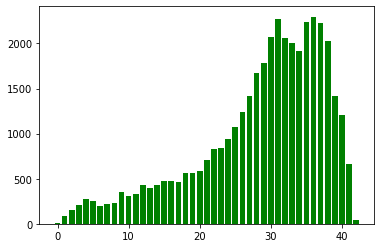

In [3]:
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

In [4]:
hist = accumulatove_runner.get_xy_histogram()
plt.bar(list(hist.keys()), hist.values(), color='g')
plt.show()

NameError: name 'accumulatove_runner' is not defined

In [ ]:
accumulative_runner.predict('WC71A6ZLRNQ87ABOB9ZRSHM1GAX7ESV0ALKAHHAVAASEI')

In [ ]:
plt.plot(accumulatove_runner.get_loss_history())
plt.show()